#**Preparacion del entorno**

In [ ]:
#numpy y panda para manipulacion de datos
import numpy as np
import pandas as pd

#seaborn, matplotlib, plutly, para visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#tiempo de ejecucion del algoritmo
import time

#proporciona funciones para crear iteradores eficientes en Python.
import itertools

#scipy
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Para guarda los dataframe y series en DRIVE.
from google.colab import drive, files, auth
from google.auth import default
drive.mount('/content/drive')
#subtipos moleculares
Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.7 MB/s eta 0:00:00
Mounted at /content/drive


#**Objetivo 1**

Determinar el puntaje ROC_AUC de las combinaciones de diez métodos de selección de características basados en filtros y trece clasificadores basados en aprendizaje de máquinas en tareas de clasificación binarias para la determinación del subtipo molecular de cáncer de mama. 

https://www.nature.com/articles/srep13087

##**Figura 5.1. Mapa de calor**

Figura 5.1. Mapa de calor que representa el rendimiento de diagnóstico (AUC) de los métodos de selección de características (en Filas) y clasificación (en Columnas). Las figura muestra cuatro sub-figuras que representan diferentes tipos de cáncer de mama: Sub-figura A: Luminal A, Sub-figura B: Luminal B, Sub-figura C: Her2 y Sub-figura D: Triple Negativo.

In [ ]:
def mapa_calor_AUCs_por_subtipo_molecular(Problema_seleccionado):

  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###Metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  

  
  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  #Crea una lista de diccionarios, que mas adelante permite crear un dataframe mediana de los 5 random state.
  lista_clf_dict_test = []

  for rs in range(len(random_state)):## este ciclo recorre la lista random_state, lo que permite hacer 5 iteraciones. 

    #crea un diccionario donde se almacenan las listas de los valores auc los metodos de seleccion de caracteristica segun el clasificador.  
    clf_dict_test = {}

    for clf in range(len(acronimo_clf)): ## este ciclo recorre la lista acronimo_clf, lo que permite hacer 13 iteraciones. 
    
        #Crea una lista donde se almacenan todos los valores AUC de los 6 numeros de caracteristicas de cada metodo de seleccion de caracteristicas. 
        lista_test_fsel_ = []##tiene 60 elementos
        #Obtiene el nombre del clasificador usado en el experimento, no la sigla. por ejemplo obtiene Vecinos más Cercanos no VMC.
        for fsel in range(len(acronimo_fsel)):## este ciclo recorre la lista fsels, lo que permite hacer 10 iteraciones.

            #crea una lista donde se almacenan todos los valores AUC obtenidos por el metodo de seleccion de caracteristicas en cada experimento segun el valor del numero de caracteristicas seleccionadas. 
            lista_test_=[]##tiene 6 elementos

            for n in range(len(n_caracteristicas)):## este ciclo recorre la lista n_caracteristicas, lo que permite hacer 6 iteraciones.

                #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
                gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
                feature_sel_test_ = float(gs.iloc[:,1][2])
                feature_sel_test = round(feature_sel_test_, 2)## se obta por dejar 2 decimales.
                lista_test_.append(feature_sel_test)##agrega el valor roc_auc a la lista_test_

            #agrega valores a la lista_test_fsel_
            lista_test_fsel_.append(lista_test_)
        
        #agrega valores al diccionario clf_dict_test 
        clf_dict_test[columnas_df[clf]] = lista_test_fsel_ ##donde la clave sera el clasificador y el valor es la la lista_test_fsel_
    
    #Agrega el diccionario clf_dict_test a la lista_clf_dict_test
    lista_clf_dict_test.append(clf_dict_test)
  
  #Dataframe donde se expone la mediana y la desviacion estandar de los valores AUC de cada combinacion de clasificador y metodo de seleccion de caracteristica, tomando en cosideracion los 5 tiempos (random state) y los 6 numeros de caracteristicas seleccionadas.   
  df_mediana_test_base = pd.DataFrame()
  df_mediana_test_ = pd.DataFrame()
  for clf in range(len(columnas_df)): ## 13 iteraciones, uno por cada clasificador
    #lista con la mediana obtenida por cada metodo de seleccion de caracteristicas
    mediana = []## 10 elementos.
    #lista con la desviacion estandar obtenida por cada metodo de seleccion de caracteristicas
    desviacion_estandar = []## 10 elementos.
    #lista con los %RSD obtenida por cada metodo de seleccion de caracteristicas
    rsd_porcentaje = []
    #lista de los intervalos de confianza del 95% por cada metodo de seleccion de caracteristca
    conf_interval = []
     #lista de los p values por cada metodo de seleccion de caracteristca
    valor_p = []

    for i in range(10): ##10 iteraciones, uno por cada metodo de seleccion de caracteristicas
      #lista con los valores AUC de cada metodo de seleccion de caracteristica, por cada random state y numero de caracteristicas seleccionados
      feature = [] ## tiene 30 elementos

      for j in range(5):## 5 iteraciones, uno por cada random state selccionado.
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][0]) # AUC obtenido con 1 caracteristica seleccionada
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][1]) # AUC obtenido con 2 caracteristica seleccionada
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][2]) # AUC obtenido con 4 caracteristica seleccionada
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][3]) # AUC obtenido con 8 caracteristica seleccionada
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][4]) # AUC obtenido con 16 caracteristica seleccionada
          feature.append(lista_clf_dict_test[j][columnas_df[clf]][i][5]) # AUC obtenido con 32 caracteristica seleccionada

      #calcula la mediana de la lista con los valores AUC de cada metodo de seleccion de caracteristica y la agrega a la lista mediana
      media = round(np.mean(feature), 2)
      mediana_ = round(np.median(feature), 2)
      mediana.append(mediana_)

      #calcula la desviacion estandar de la lista con los valores AUC de cada metodo de seleccion de caracteristica y la agrega a la lista desviacion estandar
      desv_std = round(np.std(feature), 2)
      desviacion_estandar.append(desv_std)

      # Calcular el %RSD
      rsd_porcentaje_ = round(((desv_std / media) * 100), 2)
      rsd_porcentaje.append(rsd_porcentaje_)

       # Calcula el intervalo de confianza del 95%
      n = len(feature)
      std_error = stats.sem(feature)
      conf_interval__ = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_ = [round(conf_interval__[0], 2), round(conf_interval__[1], 2)]
      conf_interval.append(conf_interval_)
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(feature, 0.5)
      if p_value >= 0.0125: 
        valor_p.append("> 0.0125")
      else: 
        valor_p.append("< 0.0125")

    # Crear dataframes para cada clasificador
    df_clf_test = pd.DataFrame({clf: [f"{mediana[i]} ± {desviacion_estandar[i]}" for i in range(len(mediana))]})
    datos = {"Mediana": mediana, "Desviacion estandar":desviacion_estandar, "%RSD":rsd_porcentaje, "Intervalo de confianza": conf_interval, "Valor p":valor_p }
    df_clf_test_base_ = pd.DataFrame(data=datos)
    columnas = pd.MultiIndex.from_tuples([(columnas_df[clf], 'Mediana'), (columnas_df[clf], 'Desviacion estandar'),(columnas_df[clf], '%RSD'), (columnas_df[clf], 'Intervalo de confianza'), (columnas_df[clf], 'Valor p') ])
    df_clf_test_base_.columns = columnas
    
    

    #agrega el dataframe creado para cada clasificasdor, al dataframe resumen.
    df_mediana_test_ = pd.concat([df_mediana_test_, df_clf_test], axis=1)
    df_mediana_test_base = pd.concat([df_mediana_test_base, df_clf_test_base_], axis=1)
    

  # Asignar índices y columnas a los dataframes
  
  df_mediana_test_base.index = indices_df
  df_mediana_test_.index = acronimo_fsel
  df_mediana_test_.columns = acronimo_clf
  df_mediana_test_values = df_mediana_test_.applymap(lambda x: float(x.split(" ± ")[0]))

  fig, ax = plt.subplots()
  # Utilizar la función 'heatmap' de seaborn
  font_dict = {'color': 'black', 'fontsize': 8}
  sns.heatmap(df_mediana_test_values, annot=True, ax=ax, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws=font_dict, vmin=0.4, vmax=0.7)
  # Añadir desviación estándar en cada celda
  for i in range(df_mediana_test_.shape[0]):
      for j in range(df_mediana_test_.shape[1]):
            plt.text(j + 0.5, i + 0.25, f"±{float(df_mediana_test_.iloc[i, j].split(' ± ')[1]):.2f}", ha='center', va='center', color='black', fontsize=5)
  

 
  #Asigna los nombres a los ejes.          
  ax.set_xlabel("Clasificadores")
  ax.set_ylabel("Metodos de seleccion de caracteristicas")
  ax.set_xticklabels(acronimo_clf)
  ax.set_yticklabels(acronimo_fsel)
  ax.set_title(Problema_seleccionado)
  # Agrega un comentario en la esquina superior izquierda
  if Problema_seleccionado == "luminal_A":
    figura = 'Sub-figura A'
    ax.set_title("Luminal A")
  elif Problema_seleccionado == "luminal_B":
    figura = 'Sub-figura B'
    ax.set_title("Luminal B")
  elif Problema_seleccionado == "her2":
    figura = 'Sub-figura C'
    ax.set_title("Her2")
  elif Problema_seleccionado == "triple_negative":
    figura = 'Sub-figura D'
    ax.set_title("Triple Negativo")

  # Agrega el comentario en la esquina inferior izquierda
  fig.text(0.06, 0.9, figura, fontsize=8)

  # Descargar la imagen con alta resolución y guarda el dataframe resumen
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/objetivo_1_figura_5.1"+Problema_seleccionado+".png", dpi=300, bbox_inches='tight')
  df_mediana_test_base.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/objetivo_1_figura_5.1"+Problema_seleccionado+".xlsx")
  
  #visualizacion
  plt.show()

In [ ]:
#ejecucion
for i in range(4):
  mapa_calor_AUCs_por_subtipo_molecular(Problema_seleccionado[i])

##**Tablas 5.1, 5.2, 5.3 y 5.4. Resultados de combinaciones**

Resultados de combinaciones de clasificadores, métodos de selección de características y número de características en términos de AUC, desviación estándar y valores de prueba, para  el subtipo molecular


In [ ]:
def orden_auc_mejor_combinacion(Problema_seleccionado):
  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  
  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]

  combinaciones = itertools.product(acronimo_clf, acronimo_fsel, n_caracteristicas)

  idx_labels = [(c[0], c[1], c[2]) for c in combinaciones]

  # Crear el índice multi-nivel
  multi_idx = pd.MultiIndex.from_tuples(idx_labels)

  ##se crean un dataframe con los valores de mediana, DE,%DER, IC, p value. de la combinacion clasificador, metodo de seleccion de caracteristicas y numero de caracteristicas.
  ##Lista vacias para crear dataframe
  mediana_auc_ = []
  desv_std_= []
  rsd_porcentaje_ = []
  conf_interval_ = []
  valor_p_ = []
  for clf in range(len(acronimo_clf)): ## este ciclo recorre la lista acronimo_clf, lo que permite hacer 13 iteraciones. 
    for fsel in range(len(acronimo_fsel)):## este ciclo recorre la lista fsels, lo que permite hacer 10 iteraciones
      for n in range(len(n_caracteristicas)):## este ciclo recorre la lista n_caracteristicas, lo que permite hacer 6 iteraciones.
        array_auc = []
        for rs in random_state:
            #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
            gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
            feature_sel_test_ = float(gs.iloc[:,1][2])
            feature_sel_test = round(feature_sel_test_, 2)
            array_auc.append(feature_sel_test)
        # Calcular la desviación estándar y la media
        desv_std = np.std(array_auc)
        desv_std_.append(round(desv_std,2))
        mediana_auc_.append(np.median(array_auc))
        # Calcular el %RSD
        media = np.mean(array_auc)
        rsd_porcentaje_.append(round(((desv_std / media) * 100),2))
        # Calcula el intervalo de confianza del 95%
        n = len(array_auc)
        std_error = stats.sem(array_auc)
        conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
        conf_interval_.append([round(conf_interval[0], 2), round(conf_interval[1], 2)])
        # Realizar un test t de una muestra y calcular el p-value
        t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
        if p_value >= 0.0125: 
          valor_p_.append("> 0.0125")
        else: 
          valor_p_.append("< 0.0125")
  data_ = {"Mediana AUC":mediana_auc_,
          "Desviacion estandar": desv_std_,
          "% Desviacion estandar relativa": rsd_porcentaje_,
          "Intervalo de Confianza": conf_interval_,
          "Valor P":valor_p_}
  df= pd.DataFrame(data = data_, index = multi_idx)
  df = df.rename(columns={"level_0": "clasificador", "level_1": "Metodo Seleccion de caracteristicas", "level_2": "Numero de caracteristicas"})
  def convert_to_num(x):
    if isinstance(x, str):
        if x.startswith(">"):
            return float(x[2:]) + 0.0001
        elif x.startswith("<"):
            return float(x[2:]) - 0.0001
    else:
        return x
  
  df['Valor P num'] = df["Valor P"].apply(convert_to_num)
  df_sorted_ = df.sort_values(by=['Valor P num',"Mediana AUC", "Desviacion estandar", "% Desviacion estandar relativa"], ascending=[True, False, True,True])
  df_sorted = df_sorted_.drop('Valor P num', axis=1)
  df_top_5 = df_sorted.head(50)
  df_top_5.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_2_objetivo_1_"+Problema_seleccionado+".xlsx")


In [ ]:

for i in range(4):
  orden_auc_mejor_combinacion(Problema_seleccionado[i])

#**Objetivo 2**

Ranking de métodos de selección de características y clasificadores basados en aprendizaje de máquinas, según el valor AUC en la determinación de los subtipos moleculares.
[Demircioğlu, Aydin PhD](https://journals.lww.com/investigativeradiology/Abstract/2022/07000/Benchmarking_Feature_Selection_Methods_in.2.aspx)

##**Ranking de métodos de selección de características en la determinación de los subtipos moleculares.**

---



###**Figura 5.2. Gráficos de cajas**

Gráficos de cajas de los valores AUC y su desviación estándar (AUC ± DE) de los doce métodos de selección de características, ordenados de mayor a menor. La Figura muestra cuatro paneles que representan los diferentes subtipos moleculares de cáncer de mama analizados: Luminal A, Luminal B, Her2 y Triple Negativo.


In [ ]:
def Ranking_fsel_AUC_todos_subtipos_box_plot():
  #funcion para obtener los p values como float
  def convert_to_num(x):
    if isinstance(x, str):
      if x.startswith(">"):
        return float(x[2:]) + 0.0001
      elif x.startswith("<"):
        return float(x[2:]) - 0.0001
      else:
        return x
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  lista_df = []
  lista_df_fsel = []
  for probl in Problema_seleccionado: 
    mediana_auc_ = []
    desv_std_= []
    rsd_porcentaje_ = []
    conf_interval_ = []
    valor_p_ = []
    df_fsel_por_subtipo = pd.DataFrame()
    for fsel in range(len(acronimo_fsel)):
      array_auc = []      
      for clf in range(len(acronimo_clf)):
        for n in range(len(n_caracteristicas)):
          for rs in random_state:
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc.append(feature_sel_test)
      df_fsel = pd.DataFrame({acronimo_fsel[fsel]: array_auc})
      df_fsel_por_subtipo = pd.concat([df_fsel_por_subtipo, df_fsel], axis=1)

      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      desv_std_.append(round(desv_std,2))
      mediana_auc_.append(np.median(array_auc))
      # Calcular el %RSD
      media = np.mean(array_auc)
      rsd_porcentaje_.append(round(((desv_std / media) * 100),2))
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_.append([round(conf_interval[0], 2), round(conf_interval[1], 2)])
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p_.append("> 0.0125")
      else: 
        valor_p_.append("< 0.0125")

    data_ = {"Mediana AUC":mediana_auc_,
            "DE": desv_std_,
            "%DER": rsd_porcentaje_,
            "IC": conf_interval_,
            "Valor P":valor_p_}
    df_= pd.DataFrame(data = data_, index = acronimo_fsel)
  
  
    df_['Valor P num'] = df_["Valor P"].apply(convert_to_num)
    df_sorted_ = df_.sort_values(by=['Valor P num',"Mediana AUC", "DE", "%DER"], ascending=[True, False, True,True])
    df_sorted = df_sorted_.drop('Valor P num', axis=1)
    indice_df_sorted = list(df_sorted.index)
    df_fsel_por_subtipo_ordenado = df_fsel_por_subtipo.reindex(columns=indice_df_sorted)
    lista_df.append(df_sorted)
    lista_df_fsel.append(df_fsel_por_subtipo_ordenado)
  



  # crear el gráfico de boxplot 
  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
  for problema, ax in enumerate(axs.flatten()):
    #guarda el dataframe de los clasificadores con las medianas, DE, etc.
    #lista_df[problema].to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/fsel_Resultado_1_objetivo_2_Anexo_1_"+Problema_seleccionado[problema]+'.xlsx') # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel

    #df con todos los valores AUC optenido por el clasificador para todo rs, num_car y m_sel_car
    df_fsel = lista_df_fsel[problema]

    #Prueba T-test para evaluar diferencia significativa (y calcular el p-value) entre los clasificadores
    fsel_1 = []
    fsel_2 = []
    p_val = []
    diff_sig = []
    for fsel1 in acronimo_fsel:
      for fsel2 in acronimo_fsel:
        t_stat, p_value = stats.ttest_ind(df_fsel[fsel1],df_fsel[fsel2])
        fsel_1.append(fsel1)
        fsel_2.append(fsel2)
        p_val.append(p_value)
        if p_value >= 0.05: 
          diff_sig.append("NO")
        else: 
          diff_sig.append("SI")

    df_diff_fsel = pd.DataFrame({"fsel_1":fsel_1,
            "fsel_2":fsel_2,
            "Valor P":p_val, 
            "Existe diferencia estadistica": diff_sig})
    #guarda un dataframe que indca si hay o no diferencia significativa entre las diversos metodos de seleccion de caracteristicas
    #df_diff_fsel.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/fsel_Resultado_1_objetivo_2_Anexo_2_"+Problema_seleccionado[problema]+'.xlsx') # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel

    
    # Crea los gráficos de violines
    df_fsel_ = df_fsel[df_fsel.median().sort_values(ascending=False).index]
    sns.boxplot(data=df_fsel_, ax=ax, fliersize=3)

    #calcula las medianas para imprimirlas en el grafico
    medianas = list(df_fsel_.median().round(2))
    desv_estandar = list(df_fsel_.std().round(2))
    
    # Agrega el comentario en la esquina inferior izquierda)
    #pone nombre a los subplot
    if Problema_seleccionado[problema] == "luminal_A":
        ax.set_title("Luminal A")
        for i in range(len(medianas)):
          ax.text(i, 0.355, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 6.5)

    elif Problema_seleccionado[problema] == "luminal_B":
        ax.set_title("Luminal B")
        for i in range(len(medianas)):
          ax.text(i, 0.245, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 6.5)

    elif Problema_seleccionado[problema] == "her2":
        ax.set_title("Her 2")
        for i in range(len(medianas)):
          ax.text(i, 0.187, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 6.5)

    elif Problema_seleccionado[problema] == "triple_negative":
        ax.set_title("Triple Negativo")
        for i in range(len(medianas)):
          ax.text(i, 0.305, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 6.5)
    
    if problema in [0,2]:
       ax.set_ylabel("Valores AUC", fontsize=8)
    
    if problema in [2,3]:
       ax.set_xlabel("Metodo de seleccion de caracteristicas", fontsize=8)

  fig.tight_layout()


  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_1_objetivo_2_.png", dpi=300, bbox_inches='tight')    
  plt.show()

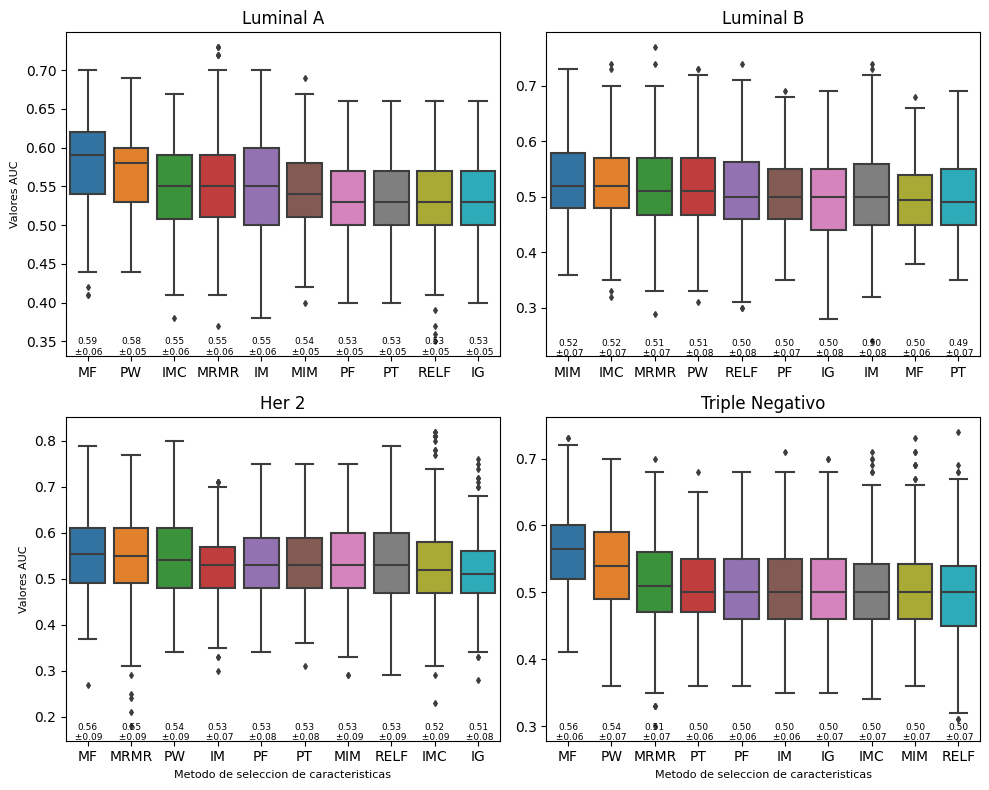

In [ ]:
Ranking_fsel_AUC_todos_subtipos_box_plot()

###**Figura 5.3. Diagramas de dispersión**

Diagramas de dispersión entre la estabilidad y el rendimiento predictivo (AUC) de los métodos de selección de características, para los cuatro subtipos moleculares. Se consideró alto rendimiento Y y estabilidad, para Luminal A AUC ≥ 0.55 (mediana de los métodos de selección de características) y %DER ≤ 9.76 (mediana de las desviaciones estándar relativas), para Luminal B AUC ≥ 0.5 y %DER ≤ 14.275, para Her2 AUC ≥ 5.3 y %DER ≤ 16.02 y para Triple Negativo AUC ≥ 0.5 y %DER ≤ 12.7.



In [ ]:
def estabilidad_y_rendimiento_AUC_fsel():
  
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  

  
  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  ##se crean un dataframe con los valores de mediana, DE,%DER, IC, p value. de la combinacion clasificador, metodo de seleccion de caracteristicas y numero de caracteristicas.
  lista_df = []  
  for probl in Problema_seleccionado: 
    ##Lista vacias para crear dataframe
    mediana_auc_ = []
    desv_std_= []
    rsd_porcentaje_ = []
    conf_interval_ = []
    valor_p_ = []
    for fsel in range(len(acronimo_fsel)):## este ciclo recorre la lista fsels, lo que permite hacer 10 iteraciones
      array_auc = []
      for clf in range(len(acronimo_clf)): ## este ciclo recorre la lista acronimo_clf, lo que permite hacer 13 iteraciones. 
        for n in range(len(n_caracteristicas)):## este ciclo recorre la lista n_caracteristicas, lo que permite hacer 6 iteraciones.
          for rs in random_state:
              #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc.append(feature_sel_test)
      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      desv_std_.append(round(desv_std,2))
      mediana_auc_.append(np.median(array_auc))
      # Calcular el %RSD
      media = np.mean(array_auc)
      rsd_porcentaje_.append(round(((desv_std / media) * 100),2))
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_.append([round(conf_interval[0], 2), round(conf_interval[1], 2)])
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p_.append("> 0.0125")
      else: 
        valor_p_.append("< 0.0125")

    data_ = {"Mediana AUC":mediana_auc_,
            "Desviacion estandar": desv_std_,
            "% Desviacion estandar relativa": rsd_porcentaje_,
            "Intervalo de Confianza": conf_interval_,
            "Valor P":valor_p_}
    df_= pd.DataFrame(data = data_, index = acronimo_fsel)
    lista_df.append(df_)

 
  # crear el gráfico de boxplot 
  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)
  for problema, ax in enumerate(axs.flatten()):
    df = lista_df[problema]
    auc_ref = df['Mediana AUC'].median()
    rsd_ref = df['% Desviacion estandar relativa'].median()
    #imprime los AUC y RSD de referencia
    print(Problema_seleccionado[problema], " auc_ref: ",auc_ref," rsd_ref: ", rsd_ref)

    #grafico de dispersion
    palette = sns.color_palette(n_colors=len(df.index))
    for i, modelo in enumerate(df.index):
      ax.scatter(df['% Desviacion estandar relativa'][i], df['Mediana AUC'][i], alpha=0.7, color=palette[i])
      ax.annotate(modelo, (df['% Desviacion estandar relativa'][i], df['Mediana AUC'][i]), fontsize=9.5, color=palette[i])

    ax.axhline(y=auc_ref, linestyle='--', color='gray')
    ax.axvline(x=rsd_ref, linestyle='-', color='gray')
    if problema in [2,3]:
      ax.set_xlabel('Desvacion estadar relativa de los puntaajes AUC (%)')
    if problema in [0,2]:
      ax.set_ylabel('Rendimiento (AUC)')
    ax.set_title(Problema_seleccionado[problema])

  # Agrega el comentario en la esquina inferior izquierda
  fig.tight_layout()


  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_2_objetivo_2_.png", dpi=300, bbox_inches='tight')    
  plt.show()
#df_sorted.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_2_objetivo_1.xlsx") # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel


luminal_A  auc_ref:  0.545  rsd_ref:  9.76
luminal_B  auc_ref:  0.5  rsd_ref:  14.275
her2  auc_ref:  0.53  rsd_ref:  16.02
triple_negative  auc_ref:  0.5  rsd_ref:  12.7


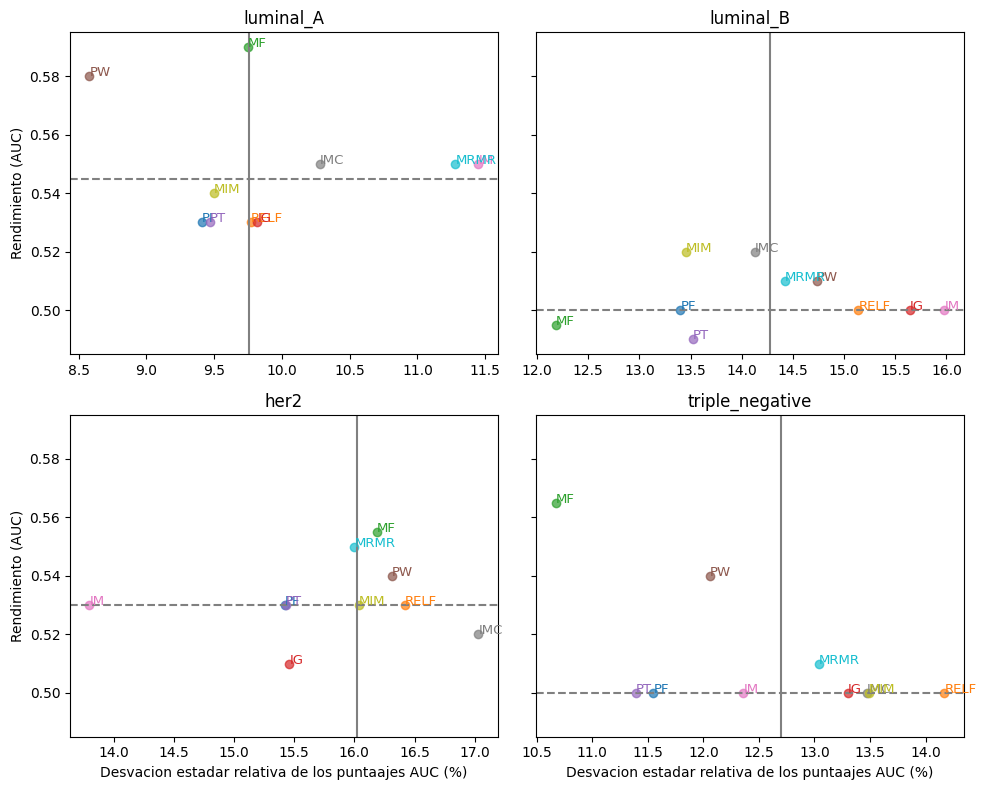

In [ ]:
estabilidad_y_rendimiento_AUC_fsel()

###**Figura 5.4. Tiempos de cómputo**

Tiempos de cómputo (en escala logarítmica) de los métodos de selección de características, promediados sobre los cuatro subtipos moleculares de cáncer.

In [ ]:
def barplot_time_fsel():
  
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]

  df_fsel_time_total = pd.DataFrame()
  for fsel in range(len(acronimo_fsel)):
    lista_fsel_time_=[]
    for probl in Problema_seleccionado:
      for Random_State in random_state:
        for clf in range(len(acronimo_clf)):
            for n in range(len(n_caracteristicas)):
              #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_time_ = float(gs.iloc[:,1].name)
              feature_sel_time = round(feature_sel_time_, 2)                
              lista_fsel_time_.append(feature_sel_time)


      # Crear dataframes para cada clasificador
    df_fsel_time = pd.DataFrame({acronimo_fsel[fsel]: lista_fsel_time_})
      
      # Concatenar los dataframes verticalmente
    df_fsel_time_total = pd.concat([df_fsel_time_total, df_fsel_time], axis=1)

  # Calcular los promedios de cada columna
  promedios = df_fsel_time_total.median().sort_values(ascending=False)

  # Ordenar las columnas en el DataFrame según los promedios
  df = df_fsel_time_total[promedios.index]
  fsels = df.columns
  
  df_fsel_time_table = pd.DataFrame()
  for i in range(len(fsels)):
      # Seleccionar la columna correspondiente
      array_auc = df[fsels[i]]
      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      media = np.mean(array_auc)
      mediana = np.median(array_auc)
      # Calcular el %RSD
      rsd_porcentaje = (desv_std / media) * 100
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_ = [round(conf_interval[0], 2), round(conf_interval[1], 2)]
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p = "> 0.0125"
      else: 
        valor_p = "< 0.0125"

      # Agregar los resultados al DataFrame
      df_fsel_time_table.loc[fsels[i], "Mediana"] = round(mediana, 2)
      df_fsel_time_table.loc[fsels[i], "Desviacion estandar"] =  round(desv_std, 2)
      df_fsel_time_table.loc[fsels[i], "Desviación estándar relativa"] =  round(rsd_porcentaje, 2)
      df_fsel_time_table.loc[fsels[i], "Intervalo de confianza"] =  f"{conf_interval_[0]} - {conf_interval_[1]}"
      df_fsel_time_table.loc[fsels[i], "p value"] =  valor_p

  # Crear gráfico de barras
  fig, ax = plt.subplots(figsize=(16,8),constrained_layout=True)
  sns.barplot(data=df, ax=ax, ci=None)
  # Obtener los objetos de los ejes
  ax = plt.gca()

  # Cambiar el tamaño de las variables de los ejes x
  ax.tick_params(axis='x', labelsize=20)
  ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
  ax.set_ylabel('Tiempò en segundo (escala logaritmica)', fontsize=20)
  ax.set_xlabel('Metodos de seleccion de caracteristicas', fontsize=20)
  #ax.set_title('Tiempo de computo de los metodos de seleccion de caracteristicas')
  plt.xticks(rotation = 45)
 
  # Agregar la mediana y la desviación estándar en cada barra
  for i in range(len(fsels)):
      array_tiempo = df[fsels[i]]
      mediana = np.median(array_tiempo)
      desv_std = np.std(array_tiempo)
      ax.text(i, 0.05, f'Med: {mediana:.2f}\nDE: {desv_std:.2f}', ha='center', va='top', fontsize= 12)
  #Descargar la imagen con alta resolución
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_3_objetivo_2_tiempo_fsel.png", dpi=300,bbox_inches='tight')
  df_fsel_time_table.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_3_objetivo_2_tiempo_fsel.xlsx")

  plt.show()


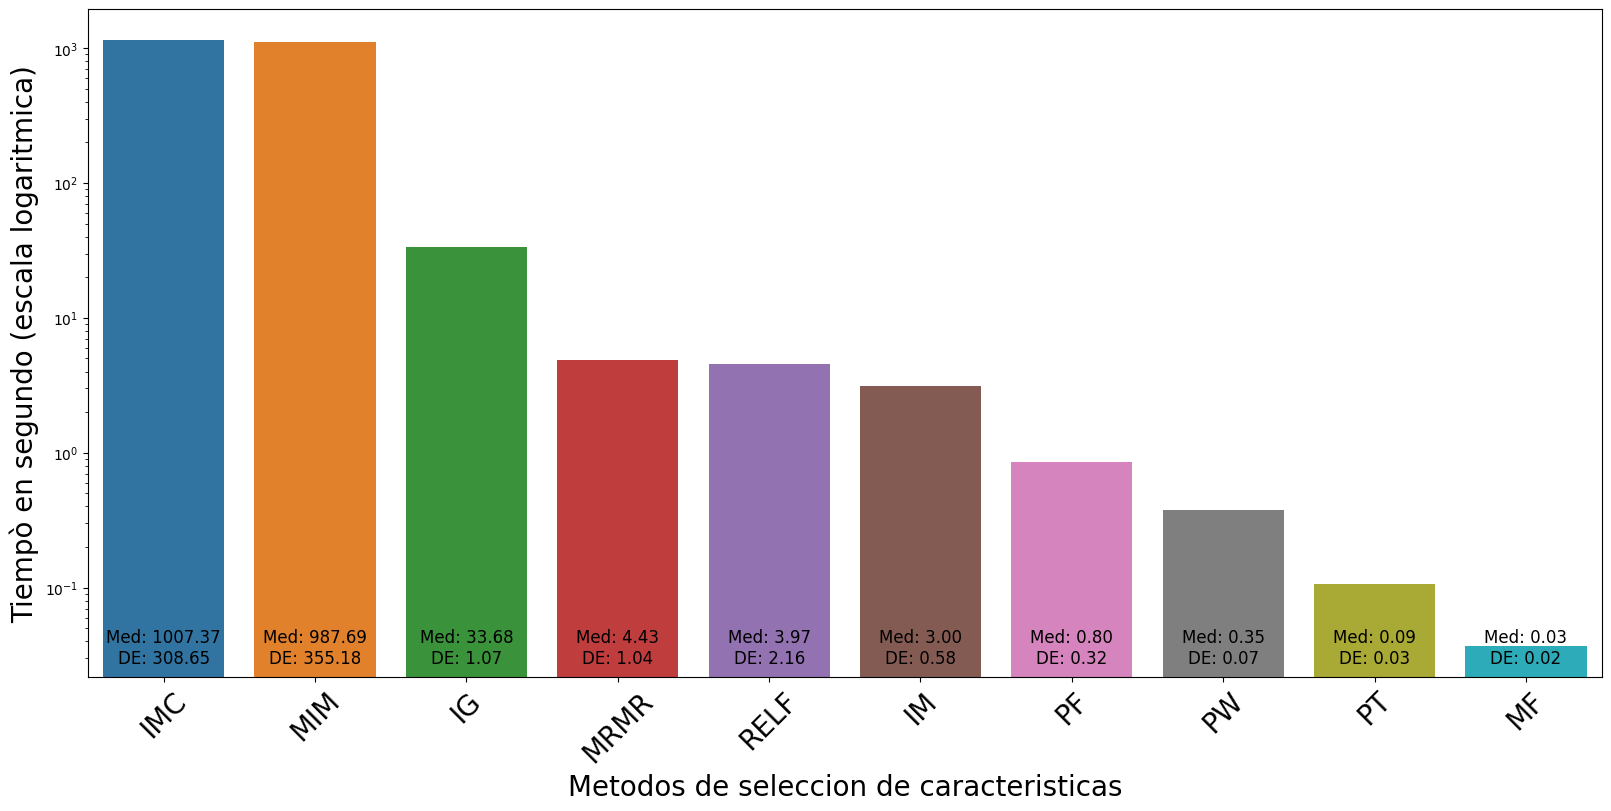

In [ ]:
barplot_time_fsel()

###**Figura 5.5. Análisis de Compromisos**

Análisis de Compromisos de los Métodos de Selección de características: Compromiso entre el relativo promedio AUC y %DER con respecto al tiempo de selección de características, medido como la diferencia respecto al mejor modelo.

In [ ]:
def plot_Auc_y_rsd_vs_time_fsel():
###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  #listas para el diccionario auc vs tiempo
  lista_auc_=[] 
  lista_time_ = []
  lista_rsd_ = []
  lista_time_rsd = []
  for probl in Problema_seleccionado: 
    df_fsel_ = pd.DataFrame()
    for fsel in range(len(acronimo_fsel)):
      lista_test=[] 
      lista_fsel_time =[]
      for n in range(len(n_caracteristicas)):
        for clf in range(len(acronimo_clf)):
          mediana_auc=[] 
          mediana_time=[]
          for Random_State in random_state:            
                  #auc metodo seleccion de caracteristicas
                  gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
                  feature_sel_test_ = float(auc_gs_fsel.iloc[:,1][2])
                  feature_sel_test = round(feature_sel_test_, 2)
                  mediana_auc.append(feature_sel_test)
                  lista_auc_.append(feature_sel_test)
                  
                  
                  #tiempo metodo seleccion de caracteristicas
                  time_gs_fsel = pd.read_csv("/content/drive/MyDrive/Radiomics_Oversampling/Estrategia_A/"+ Problema_seleccionado + "/"+ over_sampling+"/Feature_Selections/"+fsels[fsel]+"/_"+str(Random_State)+"/feature_names/"+Problema_seleccionado +"_"+over_sampling+"_rs_"+str(Random_State)+"_feature_names"+fsels[fsel]+str(n_caracteristicas[n])+".csv")
                  feature_sel_time_ = float(time_gs_fsel.iloc[:,1].name)
                  feature_sel_time = round(feature_sel_time_, 2)
                  mediana_time.append(feature_sel_time)
                  lista_time_.append(feature_sel_time)

          # Calcular la desviación estándar y la media de auc y mediana de tiempo 
          desv_std = np.std(mediana_auc)
          media = np.mean(mediana_auc)
          mediana = np.mean(mediana_time)
          # Calcular el %RSD
          lista_rsd_.append(round(((desv_std / media) * 100),2))
          lista_time_rsd.append(round(mediana,2))

  # crear el gráfico de dispersión
  fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
  for problems, ax in enumerate(axs.flatten()):
    if problems == 0:
      # Cálculo del logarithms of the training times utilizando la fórmula log(1 + mean training time)
      x_regresion = [np.log(1 + (t/np.mean(lista_time_))) for t in lista_time_]
      #Lista de valores AUC segun clasificador
      mean_auc = np.mean(lista_auc_)
      y_regresion = [auc / mean_auc for auc in lista_auc_]

      # Calcular la regresión lineal y el valor p
      slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
      
      # Añadir la línea de regresión al gráfico
      x_pendiente = np.array([min(x_regresion), max(x_regresion)])
      y_pendiente = slope * x_pendiente + intercept

      #sns.lineplot(x=x_pendiente, y=y_pendiente, color='black', linestyle='-', linewidth=1, ax=ax)
      sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)


      #ax.set_xscale('log')  # Establecer escala logarítmica en el eje y
      #ax.set_xlabel("log(1 + promedio de seleccion de caracteristicas)", fontsize=8)
      ax.set_ylabel("Promedio relativo AUCs", fontsize=14)
      # Agregar texto en el gráfico
      ax.text(0.98, 0.98,'Trade-offs: R^2 = {:.2f}, p = {:.2f}'.format(r_value**2, p_value), fontsize=18,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')

    elif problems == 1:
      # Cálculo del logarithms of the training times utilizando la fórmula log(1 + mean training time)
      x_regresion = [np.log(1 + (t/np.mean(lista_time_rsd))) for t in lista_time_rsd]
      #Lista de valores AUC segun clasificador
      mean_auc = np.mean(lista_rsd_)
      y_regresion = [auc / mean_auc for auc in lista_rsd_]

      # Calcular la regresión lineal y el valor p
      slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
      
      # Añadir la línea de regresión al gráfico
      x_pendiente = np.array([min(x_regresion), max(x_regresion)])
      y_pendiente = slope * x_pendiente + intercept

      #sns.lineplot(x=x_pendiente, y=y_pendiente, color='black', linestyle='-', linewidth=1, ax=ax)
      sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)


      #ax.set_xscale('log')  # Establecer escala logarítmica en el eje y
      ax.set_xlabel("log(1 + promedio de seleccion de caracteristicas)", fontsize=20)
      ax.set_ylabel("Promedio relativo %DER",  fontsize=14)
      # Agregar texto en el gráfico
      ax.text(0.98, 0.98,'Trade-offs: R^2 = {:.2f}, p = {:.2f}'.format(r_value**2, p_value), fontsize=18,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')
      

  plt.tight_layout()
  #Descargar la imagen con alta resolución
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_4_objetivo_2_tiempo_vs_auc_fsel.png", dpi=300,bbox_inches='tight')

  plt.show()


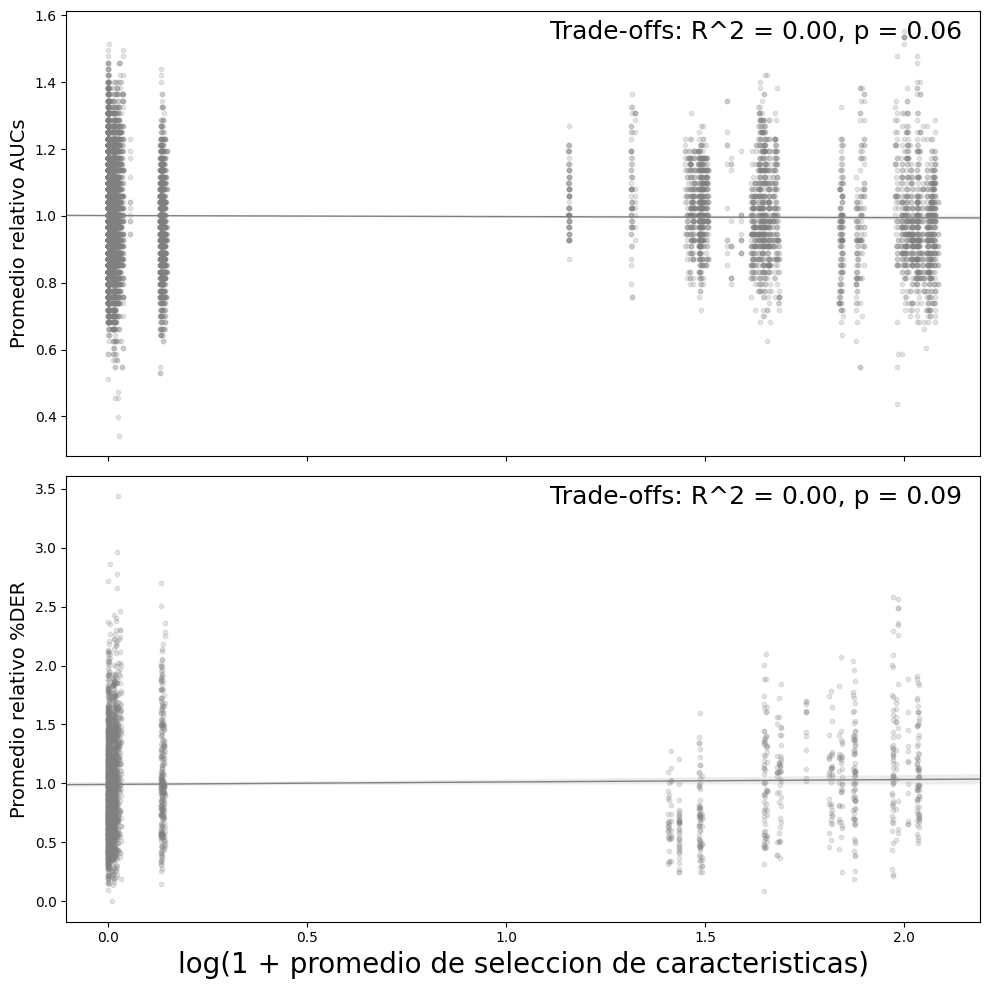

In [ ]:
plot_Auc_y_rsd_vs_time_fsel()

##**Ranking de  clasificadores basados en aprendizaje de máquinas en la determinación de los subtipos moleculares.**

###**Figura 5.6. Gráficos de cajas**

Figura 5.6. Gráficos de cajas de los valores AUC y su desviación estándar (AUC ± DE). Se presentan los trece clasificadores, ordenados de mayor a menor. Los paneles representan los cuatro subtipos de cáncer de mama analizados: Luminal A, Luminal B, Her2 y Triple Negativo.

In [ ]:
def Ranking_clf_AUC_todos_subtipos_box_plot():
  #funcion para obtener los p values como float
  def convert_to_num(x):
    if isinstance(x, str):
      if x.startswith(">"):
        return float(x[2:]) + 0.0001
      elif x.startswith("<"):
        return float(x[2:]) - 0.0001
      else:
        return x
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  lista_df = []
  lista_df_clf = []
  for probl in Problema_seleccionado: 
    mediana_auc_ = []
    desv_std_= []
    rsd_porcentaje_ = []
    conf_interval_ = []
    valor_p_ = []
    df_fsel_por_subtipo = pd.DataFrame()
    for clf in range(len(acronimo_clf)):
      array_auc = []      
      for fsel in range(len(acronimo_fsel)):
        for n in range(len(n_caracteristicas)):
          for rs in random_state:
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc.append(feature_sel_test)
      df_fsel = pd.DataFrame({acronimo_fsel[fsel]: array_auc})
      df_fsel_por_subtipo = pd.concat([df_fsel_por_subtipo, df_fsel], axis=1)

      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      desv_std_.append(round(desv_std,2))
      mediana_auc_.append(np.median(array_auc))
      # Calcular el %RSD
      media = np.mean(array_auc)
      rsd_porcentaje_.append(round(((desv_std / media) * 100),2))
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_.append([round(conf_interval[0], 2), round(conf_interval[1], 2)])
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p_.append("> 0.0125")
      else: 
        valor_p_.append("< 0.0125")

    data_ = {"Mediana AUC":mediana_auc_,
            "DE": desv_std_,
            "%DER": rsd_porcentaje_,
            "IC": conf_interval_,
            "Valor P":valor_p_}
    df_= pd.DataFrame(data = data_, index = acronimo_fsel)
  
  
    df_['Valor P num'] = df_["Valor P"].apply(convert_to_num)
    df_sorted_ = df_.sort_values(by=['Valor P num',"Mediana AUC", "DE", "%DER"], ascending=[True, False, True,True])
    df_sorted = df_sorted_.drop('Valor P num', axis=1)
    indice_df_sorted = list(df_sorted.index)
    df_fsel_por_subtipo_ordenado = df_fsel_por_subtipo.reindex(columns=indice_df_sorted)
    lista_df.append(df_sorted)
    lista_df_fsel.append(df_fsel_por_subtipo_ordenado)
  


  # crear el gráfico de boxplot 
  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
  for problema, ax in enumerate(axs.flatten()):
    #guarda el dataframe de los clasificadores con las medianas, DE, etc.
    #lista_df[problema].to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/clf_Resultado_5_objetivo_2_Anexo_2_"+Problema_seleccionado[problema]+'.xlsx') # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel

    #df con todos los valores AUC optenido por el clasificador para todo rs, num_car y m_sel_car
    df_clf = lista_df_clf[problema]

    #Prueba T-test para evaluar diferencia significativa (y calcular el p-value) entre los clasificadores
    clf_1 = []
    clf_2 = []
    p_val = []
    diff_sig = []
    for clf1 in acronimo_clf:
      for clf2 in acronimo_clf:
        t_stat, p_value = stats.ttest_ind(df_clf[clf1],df_clf[clf2])
        clf_1.append(clf1)
        clf_2.append(clf2)
        p_val.append(p_value)
        if p_value >= 0.05: 
          diff_sig.append("NO")
        else: 
          diff_sig.append("SI")

    df_diff_clf = pd.DataFrame({"Clf_1":clf_1,
            "Clf_2":clf_1,
            "Valor P":p_val, 
            "Existe diferencia estadistica": diff_sig})
    #df_diff_clf.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/clf_Resultado_5_objetivo_2_Anexo_2.2_"+Problema_seleccionado[problema]+'.xlsx') # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel
    # Ocultar las etiquetas de los ejes x e y de los subplot no deseados

    #Transforma los AUC en en pomedios relativos
    df_clf_auc_rel = pd.DataFrame() 
    for clf_ in acronimo_clf:
        y = df_clf[clf_]
        valores_auc = y.tolist()
        mean_auc = np.mean(valores_auc)
        mean_relative_auc = [auc / mean_auc for auc in valores_auc]
        df_clf_ = pd.DataFrame({clf_: mean_relative_auc})
        df_clf_auc_rel =  pd.concat([df_clf_auc_rel, df_clf_], axis=1)
    

    
    # Crea los gráficos de violines
    df_clf_ = df_clf[df_clf.median().sort_values(ascending=False).index]
    sns.boxplot(data=df_clf_, ax=ax)

    #calcula las medianas para imprimirlas en el grafico
    medianas = list(df_clf_.median().round(2))
    desv_estandar = list(df_clf_.std().round(2))
    
    # Agrega el comentario en la esquina inferior izquierda)
    #pone nombre a los subplot
    if Problema_seleccionado[problema] == "luminal_A":
        ax.set_title("Luminal A")
        for i in range(len(medianas)):
          ax.text(i, 0.35, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 5)

    elif Problema_seleccionado[problema] == "luminal_B":
        ax.set_title("Luminal B")
        for i in range(len(medianas)):
          ax.text(i, 0.238, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 5)

    elif Problema_seleccionado[problema] == "her2":
        ax.set_title("Her 2")
        for i in range(len(medianas)):
          ax.text(i, 0.18, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 5)

    elif Problema_seleccionado[problema] == "triple_negative":
        ax.set_title("Triple Negativo")
        for i in range(len(medianas)):
          ax.text(i, 0.298, f'{medianas[i]:.2f}\n ±{desv_estandar[i]:.2f}', ha='center', va='top', fontsize= 5)

    if problema in [0,2]:
       ax.set_ylabel("Valores AUC", fontsize=8)
    
    if problema in [2,3]:
       ax.set_xlabel("Clasificadores", fontsize=8)

  fig.tight_layout()


  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_5_objetivo_2_ranking_clf.png", dpi=300, bbox_inches='tight')    
  plt.show()

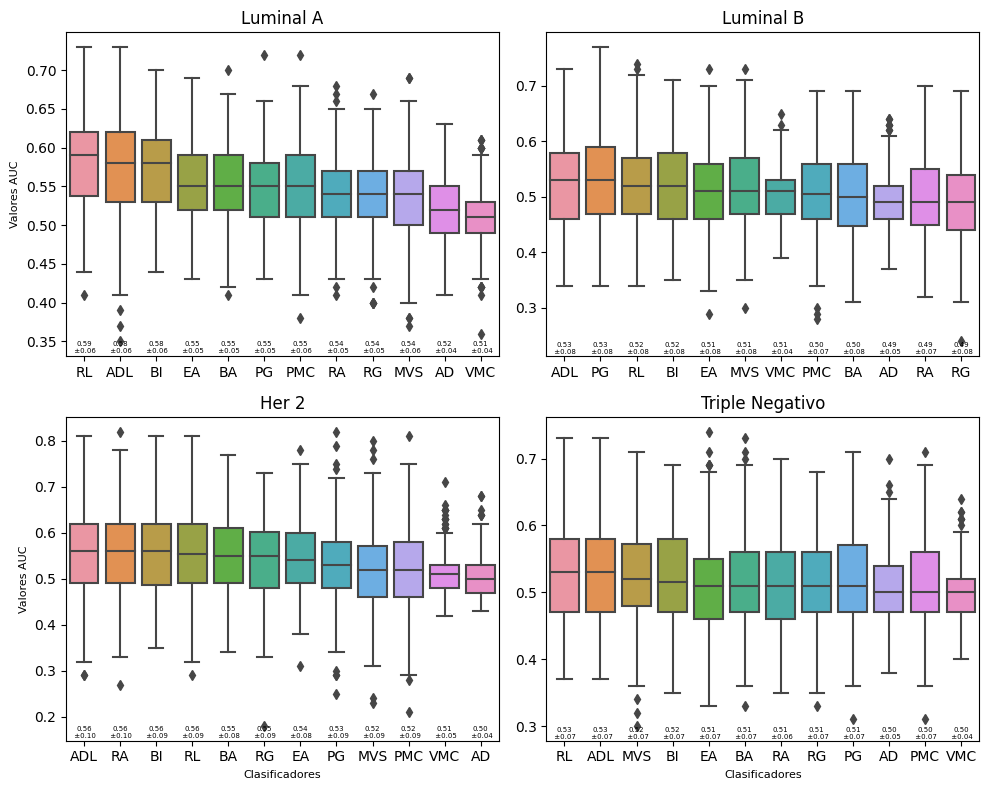

In [ ]:
Ranking_clf_AUC_todos_subtipos_box_plot()

###**Figura 5.7. Diagramas de dispersión**

In [ ]:
def estabilidad_y_rendimiento_AUC_clf():
  
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  

  
  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  ##se crean un dataframe con los valores de mediana, DE,%DER, IC, p value. de la combinacion clasificador, metodo de seleccion de caracteristicas y numero de caracteristicas.
  lista_df = []  
  for probl in Problema_seleccionado: 
    ##Lista vacias para crear dataframe
    mediana_auc_ = []
    desv_std_= []
    rsd_porcentaje_ = []
    conf_interval_ = []
    valor_p_ = []
    for clf in range(len(acronimo_clf)): ## este ciclo recorre la lista acronimo_clf, lo que permite hacer 13 iteraciones. 
      array_auc = []
      for fsel in range(len(acronimo_fsel)):## este ciclo recorre la lista fsels, lo que permite hacer 10 iteraciones
        for n in range(len(n_caracteristicas)):## este ciclo recorre la lista n_caracteristicas, lo que permite hacer 6 iteraciones.
          for rs in random_state:
              #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc.append(feature_sel_test)
      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      desv_std_.append(round(desv_std,2))
      mediana_auc_.append(np.median(array_auc))
      # Calcular el %RSD
      media = np.mean(array_auc)
      rsd_porcentaje_.append(round(((desv_std / media) * 100),2))
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_.append([round(conf_interval[0], 2), round(conf_interval[1], 2)])
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p_.append("> 0.0125")
      else: 
        valor_p_.append("< 0.0125")

    data_ = {"Mediana AUC":mediana_auc_,
            "Desviacion estandar": desv_std_,
            "% Desviacion estandar relativa": rsd_porcentaje_,
            "Intervalo de Confianza": conf_interval_,
            "Valor P":valor_p_}
    df_= pd.DataFrame(data = data_, index = acronimo_fsel)
    lista_df.append(df_)

  # crear el gráfico de boxplot 
  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)
  for problema, ax in enumerate(axs.flatten()):
    df = lista_df[problema]
    auc_ref = df['Mediana AUC'].median()
    rsd_ref = df['% Desviacion estandar relativa'].median()
    print(Problema_seleccionado[problema], " auc_ref: ",auc_ref," rsd_ref: ", rsd_ref)
    palette = sns.color_palette(n_colors=len(df.index))
    for i, modelo in enumerate(df.index):
      ax.scatter(df['% Desviacion estandar relativa'][i], df['Mediana AUC'][i], alpha=0.7, color=palette[i])
      ax.annotate(modelo, (df['% Desviacion estandar relativa'][i], df['Mediana AUC'][i]), fontsize=9.5, color=palette[i])

    ax.axhline(y=auc_ref, linestyle='--', color='gray')
    ax.axvline(x=rsd_ref, linestyle='-', color='gray')
  

    
    #lista_df[problema].to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_1_objetivo_2_Anexo_1_"+Problema_seleccionado[problema]+'.xlsx') # guarda el dataframe con los valores de la mediana, desvstd, etc... en un archivo excel
    # Agrega el comentario en la esquina inferior izquierda
  
   # Ocultar las etiquetas de los ejes x e y de los subplot no deseados
    if (problema+1) % 2 != 0:
        ax.set_ylabel('Rendimiento (AUC)')
    if problema >= 2:
        ax.set_xlabel('% Desviacion estandar relativa')
    #pone nombre a los subplot
    if Problema_seleccionado[problema] == "luminal_A":
        ax.set_title("Luminal A")
    elif Problema_seleccionado[problema] == "luminal_B":
        ax.set_title("Luminal B")
    elif Problema_seleccionado[problema] == "her2":
        ax.set_title("Her 2")
    elif Problema_seleccionado[problema] == "triple_negative":
        ax.set_title("Triple Negativo")
  
  fig.tight_layout()
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_6_objetivo_2_auc_vs_DER_clf.png", dpi=300, bbox_inches='tight')    
  
  
  fig.legend()
  plt.show()

luminal_A  auc_ref:  0.55  rsd_ref:  9.725
luminal_B  auc_ref:  0.51  rsd_ref:  14.93
her2  auc_ref:  0.545  rsd_ref:  16.634999999999998
triple_negative  auc_ref:  0.51  rsd_ref:  13.59


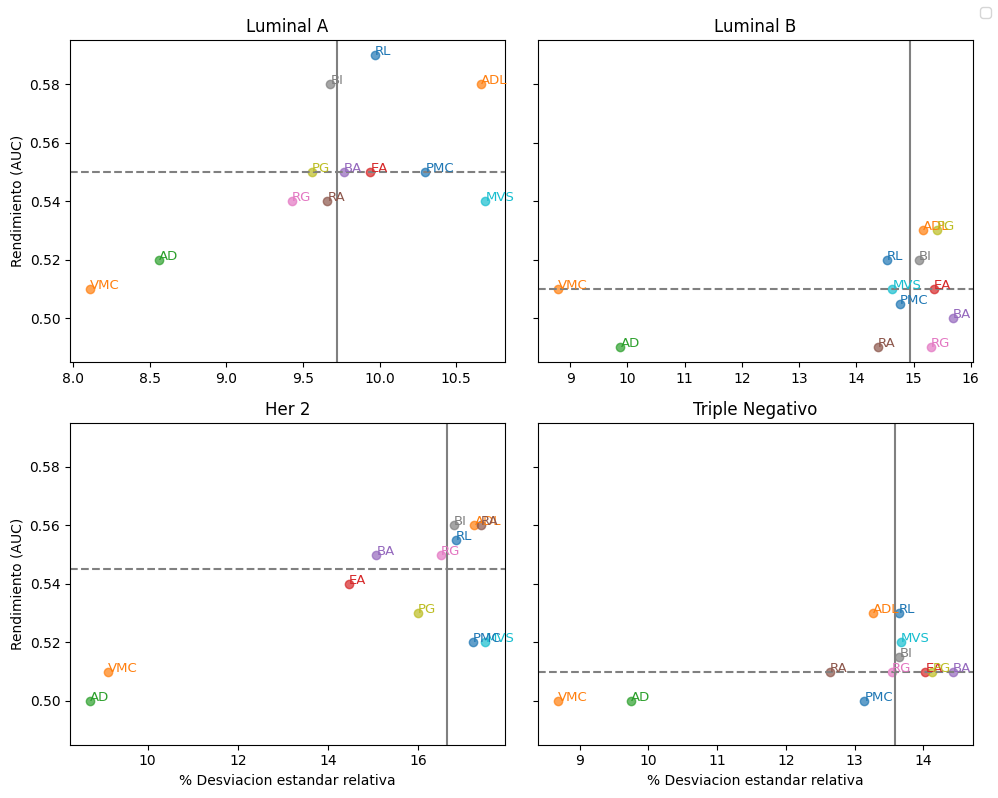

In [ ]:
estabilidad_y_rendimiento_AUC_clf()

###**Figura 5.8. Tiempos de entrenamiento**

Tiempos de entrenamiento (en escala logarítmica) para cada clasificador promediado sobre los cuatro subtipos moleculares de cáncer analizados.

In [ ]:
def barplot_time_clf():
  
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]

  df_clf_time_total = pd.DataFrame()
  
  for clf in range(len(acronimo_clf)):
    lista_clf_time_=[]
    for probl in Problema_seleccionado:
      for Random_State in random_state:
        for fsel in range(len(acronimo_fsel)):
            for n in range(len(n_caracteristicas)):
              #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_time_ = float(gs.iloc[:,1].name)
              feature_sel_time = round(feature_sel_time_, 2)                
              lista_fsel_time_.append(feature_sel_time)


      # Crear dataframes para cada clasificador
    df_clf_time = pd.DataFrame({acronimo_clf[clf]: lista_clf_time_})
      
      # Concatenar los dataframes verticalmente
    df_clf_time_total = pd.concat([df_clf_time_total, df_clf_time], axis=1)
   

  # Calcular los promedios de cada columna
  medianas = df_clf_time_total.median().sort_values(ascending=False)

  # Ordenar las columnas en el DataFrame según los promedios
  df = df_clf_time_total[medianas.index]
  classifier = df.columns
  
  df_clf_time_table = pd.DataFrame()
  for i in range(len(classifier)):
      # Seleccionar la columna correspondiente
      array_auc = df[classifier[i]]
      # Calcular la desviación estándar y la media
      desv_std = np.std(array_auc)
      media = np.mean(array_auc)
      mediana = np.median(array_auc)
      # Calcular el %RSD
      rsd_porcentaje = (desv_std / media) * 100
      # Calcula el intervalo de confianza del 95%
      n = len(array_auc)
      std_error = stats.sem(array_auc)
      conf_interval = stats.t.interval(0.95, n-1, loc=media, scale=std_error)
      conf_interval_ = [round(conf_interval[0], 2), round(conf_interval[1], 2)]
      # Realizar un test t de una muestra y calcular el p-value
      t_stat, p_value = stats.ttest_1samp(array_auc, 0.5)
      if p_value >= 0.0125: 
        valor_p = "> 0.0125"
      else: 
        valor_p = "< 0.0125"

      # Agregar los resultados al DataFrame
      df_clf_time_table.loc[classifier[i], "Mediana"] = round(mediana, 2)
      df_clf_time_table.loc[classifier[i], "Desviacion estandar"] =  round(desv_std, 2)
      df_clf_time_table.loc[classifier[i], "Desviación estándar relativa"] =  round(rsd_porcentaje, 2)
      df_clf_time_table.loc[classifier[i], "Intervalo de confianza"] =  f"{conf_interval_[0]} - {conf_interval_[1]}"
      df_clf_time_table.loc[classifier[i], "p value"] =  valor_p

  # Crear gráfico de barras
  fig, ax = plt.subplots(figsize=(16,8),constrained_layout=True)
  sns.barplot(data=df, ax=ax, ci=None)
  # Obtener los objetos de los ejes
  ax = plt.gca()
  # Cambiar el tamaño de las variables de los ejes x
  ax.tick_params(axis='x', labelsize=20)
  ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
  ax.set_ylabel('Tiempo en segundo (escala logaritmica)', fontsize=18)
  ax.set_xlabel('Clasificador', fontsize=24)
  #ax.set_title('Tiempo de computo de los metodos de seleccion de caracteristicas')
  plt.xticks(rotation = 45)
  
  # Agregar la mediana y la desviación estándar en cada barra
  for i in range(len(classifier)):
      array_tiempo = df[classifier[i]]
      mediana = np.median(array_tiempo)
      desv_std = np.std(array_tiempo)
      ax.text(i, 4.6, f'Med: {mediana:.2f}\nDE: {desv_std:.2f}', ha='center', va='top', fontsize= 10)
  # Descargar la imagen con alta resolución
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_7_objetivo_2_tiempo_clf.png", dpi=300, bbox_inches='tight')
  df_clf_time_table.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_7_objetivo_2_tiempo_clf.xlsx")
  plt.show()
  tiempo_total = df.sum().sum()
  return tiempo_total, df_clf_time_table

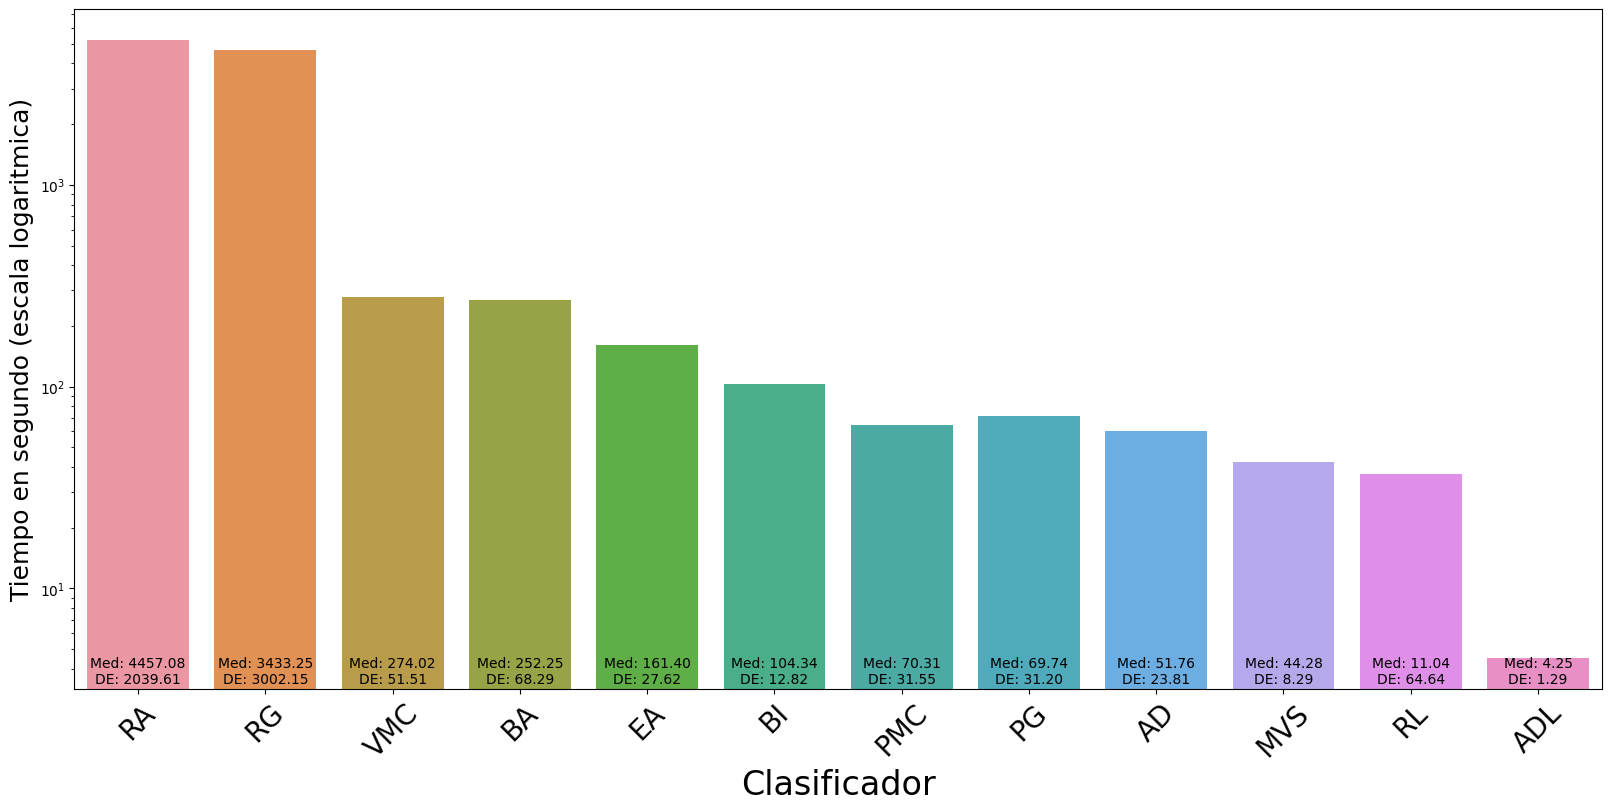

In [ ]:
tiempo_total, df_clf_time_table = barplot_time_clf()

###**Figura 5.9. Análisis de Compromisos**

Análisis de Compromisos de los Métodos de Clasificación: Compromiso entre el promedio relativo promedio AUC y %DER con respecto al promedio del tiempo de entrenamiento, medido como la diferencia respecto al mejor modelo.

In [ ]:
def plot_Auc_y_rsd_vs_time_clf():
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  #listas para el diccionario auc vs tiempo
  lista_auc_=[] 
  lista_time_ = []
  lista_rsd_ = []
  lista_time_rsd = []
  for probl in Problema_seleccionado: 
    df_fsel_ = pd.DataFrame()
    for fsel in range(len(acronimo_fsel)):
      lista_test=[] 
      lista_fsel_time =[]
      for n in range(len(n_caracteristicas)):
        for clf in range(len(acronimo_clf)):
          mediana_auc=[] 
          mediana_time=[]
          for Random_State in random_state:  
                  gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")gs = pd.read_csv("/content/drive/MyDrive/Radiomics_Oversampling/Estrategia_A/"+ Problema_seleccionado + "/"+ over_sampling+"/clasificadores/"+name_estimador+"/"+fsels[fsel]+"/_"+str(Random_State)+"/"+Problema_seleccionado +"_"+classifier[clf]+"_"+over_sampling+"_rs_"+str(Random_State)+fsels[fsel]+str(n_caracteristicas[n])+".csv")
                  feature_sel_test_ = float(gs.iloc[:,1][2])
                  feature_sel_test = round(feature_sel_test_, 2)
                  lista_auc_.append(feature_sel_test)
                  mediana_auc.append(feature_sel_test)
                  
                  gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
                  feature_clf_time_ = float(gs.iloc[:,1][7])
                  feature_clf_time = round(feature_clf_time_, 2)
                  lista_time_.append(feature_clf_time)
                  mediana_time.append(feature_clf_time)
            
          # Calcular la desviación estándar y la media de auc y mediana de tiempo 
          desv_std = np.std(mediana_auc)
          media = np.mean(mediana_auc)
          mediana = np.mean(mediana_time)
          # Calcular el %RSD
          lista_rsd_.append(round(((desv_std / media) * 100),2))
          lista_time_rsd.append(round(mediana,2))

            
  # crear el gráfico de dispersión
  fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
  for problems, ax in enumerate(axs.flatten()):
    if problems == 0:
      # Cálculo del logarithms of the training times utilizando la fórmula log(1 + mean training time)
      x_regresion = [np.log(1 + (t/np.mean(lista_time_))) for t in lista_time_]
      #Lista de valores AUC segun clasificador
      mean_auc = np.mean(lista_auc_)
      y_regresion = [auc / mean_auc for auc in lista_auc_]

      # Calcular la regresión lineal y el valor p
      slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
      
      # Añadir la línea de regresión al gráfico
      x_pendiente = np.array([min(x_regresion), max(x_regresion)])
      y_pendiente = slope * x_pendiente + intercept

      #sns.lineplot(x=x_pendiente, y=y_pendiente, color='black', linestyle='-', linewidth=1, ax=ax)
      sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)


      #ax.set_xscale('log')  # Establecer escala logarítmica en el eje y
      #ax.set_xlabel("log(1 + promedio de tiempo de entrenamiento)", fontsize=8)
      ax.set_ylabel("Promedio relativo AUCs", fontsize=14)
      # Agregar texto en el gráfico
      ax.text(0.98, 0.98,'Trade-offs: R^2 = {:.2f}, p = {:.2f}'.format(r_value**2, p_value), fontsize=18,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')

    elif problems == 1:
      # Cálculo del logarithms of the training times utilizando la fórmula log(1 + mean training time)
      x_regresion = [np.log(1 + (t/np.mean(lista_time_rsd))) for t in lista_time_rsd]
      #Lista de valores AUC segun clasificador
      mean_auc = np.mean(lista_rsd_)
      y_regresion = [auc / mean_auc for auc in lista_rsd_]

      # Calcular la regresión lineal y el valor p
      slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
      
      # Añadir la línea de regresión al gráfico
      x_pendiente = np.array([min(x_regresion), max(x_regresion)])
      y_pendiente = slope * x_pendiente + intercept

      #sns.lineplot(x=x_pendiente, y=y_pendiente, color='black', linestyle='-', linewidth=1, ax=ax)
      sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)


      #ax.set_xscale('log')  # Establecer escala logarítmica en el eje y
      ax.set_xlabel("log(1 + promedio de tiempo de entrenamiento)", fontsize=20)
      ax.set_ylabel("Promedio relativo %DER", fontsize=14 )
      # Agregar texto en el gráfico
      ax.text(0.98, 0.98,'Trade-offs: R^2 = {:.2f}, p = {:.2f}'.format(r_value**2, p_value), fontsize=18,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')
      

  fig.tight_layout()  
  #Descargar la imagen con alta resolución
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_8_objetivo_2_tiempo_vs_auc_clf.png", dpi=300,bbox_inches='tight')

  plt.show()


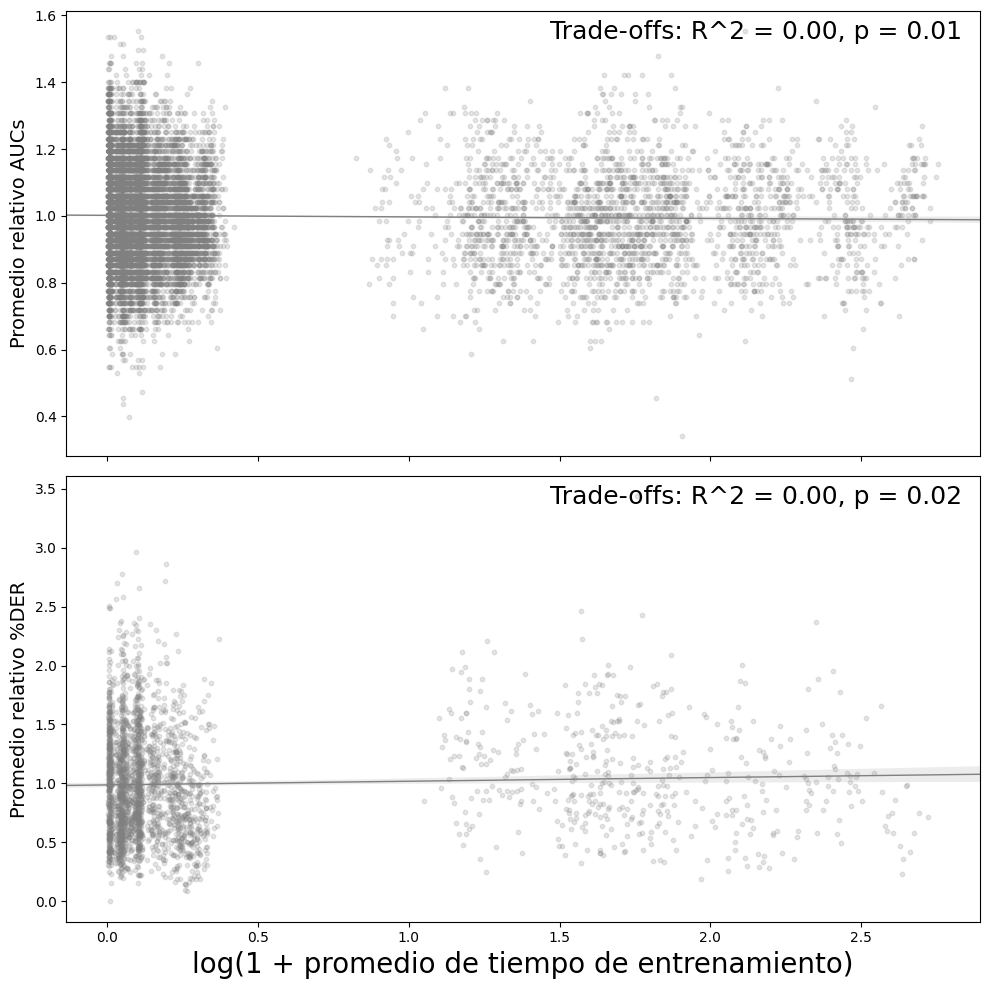

In [ ]:
plot_Auc_y_rsd_vs_time_clf()

#**Objetivo 3**


Explorar la relación entre el número de características seleccionadas y el ROC_AUC obtenidos por cada método de selección de características, según el clasificador utilizado.

##**Relación AUC vs n_caracteristicas**



Grafico de violin que que relaciona numero de caracterisitcas y el AUC

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4811956/ 

###**Figura 5.10. Relación entre el Rendimiento AUC y el Número de Características por subtipo de Cáncer de Mama.**

In [ ]:
def plot_AUCs_n_caracteristicas_x_subtipo():
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  
  lista_df_n_fsel = []
  for probl in Problema_seleccionado: 
    df_n_caracteristicas =pd.DataFrame()
    for n in range(len(n_caracteristicas)):
      lista_test_=[]    
      for clf in range(len(acronimo_clf)): #len() = 13
        for fsel in range(len(acronimo_fsel)): #len() = 10
          for rs in random_state:
                #auc metodo seleccion de caracteristicas
                gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
                feature_sel_test_ = float(gs.iloc[:,1][2])
                feature_sel_test = round(feature_sel_test_, 2)
                lista_test_.append(feature_sel_test)
            
      # Crear dataframes para cada clasificador
      num_fsel =str(n_caracteristicas[n])
      df_n_caracteristicas_test = pd.DataFrame({num_fsel: lista_test_})
      df_n_caracteristicas = pd.concat([df_n_caracteristicas, df_n_caracteristicas_test], axis=1)
    lista_df_n_fsel.append(df_n_caracteristicas)
       

  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
  for problems, ax in enumerate(axs.flatten()):
    df_n_fsel = lista_df_n_fsel[problems]
    # Iteración sobre las claves del diccionario
    x_regresion = []
    y_regresion = []
    for n in range(len(n_caracteristicas)):
      num_fsel_ =str(n_caracteristicas[n])
      y = df_n_fsel[num_fsel_].tolist()
      y_regresion.append(y)

      n_f = n_caracteristicas[n]
      x = list([n_f] * len(y))
      x_regresion.append(x)

        
    

    # Calcular la regresión lineal y el valor p
    x_regresion = np.array(x_regresion).flatten()
    y_regresion = np.array(y_regresion).flatten()
    slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
    sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)
    
    ax.set_title(Problema_seleccionado[problems])

    # Ocultar las etiquetas de los ejes x e y de los subplot no deseados
    if (problems+1) % 2 != 0:
        ax.set_ylabel("Valores AUC", fontsize=13)
    if problems < 2:
        ax.set_xlabel("Numero de caracteristicas", fontsize=13)

    # Mostrar solo las etiquetas de los ejes y en la primera columna y las etiquetas de los ejes x en la segunda fila
    if problems == 0 or problems == 2:
        ax.set_ylabel("Valores AUC", fontsize=13)
    else:
        ax.yaxis.set_visible(False)

    if problems == 2 or problems == 3:
        ax.set_xlabel("Numero de caracteristicas", fontsize=13)
    else:
        ax.xaxis.set_visible(False)

    # Agregar texto en el gráfico
    ax.text(0.98, 0.98,'Trade-offs: R = {:.2f}, p = {:.2f}'.format(r_value, p_value), fontsize=12,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')
    
    #pone nombre a los subplot
    if Problema_seleccionado[problems] == "luminal_A":
        ax.set_title("Luminal A", fontsize=16)
    elif Problema_seleccionado[problems] == "luminal_B":
        ax.set_title("Luminal B", fontsize=16)
    elif Problema_seleccionado[problems] == "her2":
        ax.set_title("Her 2", fontsize=16)
    elif Problema_seleccionado[problems] == "triple_negative":
        ax.set_title("Triple Negativo", fontsize=16)
      
  fig.tight_layout()  
  #Descargar la imagen con alta resolución
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_1_objetivo_3.png", dpi=300,bbox_inches='tight')

  plt.show()


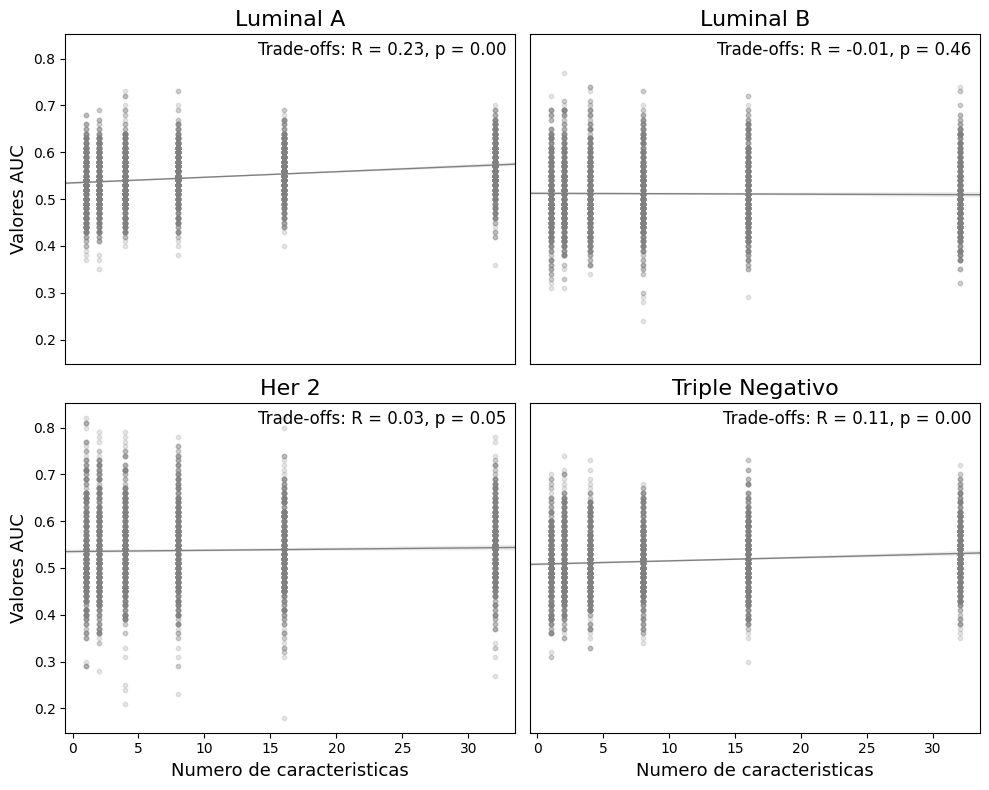

In [ ]:
plot_AUCs_n_caracteristicas_x_subtipo()

###**Figura 5.11.Relación entre el Rendimiento AUC y el Número de Características para cada grupo de clasificadores para los distintos subtipos moleculares.**

In [ ]:
def plot_AUCs_n_caracteristicas_x_tipo_clf():
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  lista_df_n_fsel_x_clf = []
  for clf in range(len(acronimo_clf)): #len() = 12 
    df_n_caracteristicas =pd.DataFrame()
    for n in range(len(n_caracteristicas)):
      lista_test_=[]    
      for probl in Problema_seleccionado:  
        for fsel in range(len(acronimo_fsel)): #len(fsels) = 10
          for rs in random_state:
                gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
                feature_sel_test_ = float(gs.iloc[:,1][2])
                feature_sel_test = round(feature_sel_test_, 2)
                lista_test_.append(feature_sel_test)
            
      # Crear dataframes para cada clasificador
      num_fsel =str(n_caracteristicas[n])
      df_n_caracteristicas_test = pd.DataFrame({num_fsel: lista_test_})
      df_n_caracteristicas = pd.concat([df_n_caracteristicas, df_n_caracteristicas_test], axis=1)
    lista_df_n_fsel_x_clf.append(df_n_caracteristicas)

  #agrupacion por tipo de clasificador  
  df_lineales = pd.concat([lista_df_n_fsel_x_clf[0], lista_df_n_fsel_x_clf[1]])
  df_arboles = pd.concat([lista_df_n_fsel_x_clf[2], lista_df_n_fsel_x_clf[3], lista_df_n_fsel_x_clf[4],lista_df_n_fsel_x_clf[5], lista_df_n_fsel_x_clf[6]])
  df_no_lineales = pd.concat([lista_df_n_fsel_x_clf[7], lista_df_n_fsel_x_clf[8], lista_df_n_fsel_x_clf[9], lista_df_n_fsel_x_clf[10], lista_df_n_fsel_x_clf[11]])

  lista_df_tipo_clf = [df_lineales,df_arboles,df_no_lineales]
  subtitulos = ["Clasificadores lineales","Clasificadores basados en arboles ","Clasificadores no lineales"]
  fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
  for clf, ax in enumerate(axs.flatten()):
    df_n_fsel_clf = lista_df_tipo_clf[clf]
    x_regresion = []
    y_regresion = []
    for n in range(len(n_caracteristicas)):
      num_fsel_ =str(n_caracteristicas[n])
      y = df_n_fsel_clf[num_fsel_].tolist()
      y_regresion.append(y)

      n_f = n_caracteristicas[n]
      x = list([n_f] * len(y))
      x_regresion.append(x)

    # Calcular la regresión lineal y el valor p
    x_regresion = np.array(x_regresion).flatten()
    y_regresion = np.array(y_regresion).flatten()

    #grafico
    slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
    sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)

  # Ocultar las etiquetas de los ejes x e y de los subplot no deseados
    if clf in [0]:
        ax.set_ylabel("Valores AUC", fontsize=14)
    if clf in [0,1,2]:
        ax.set_xlabel("Numero de caracteristicas", fontsize=11)

    # Agregar texto en el gráfico
    ax.text(0.98, 0.98,'Trade-offs: R = {:.2f}, p = {:.2f}'.format(r_value, p_value), fontsize=12,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')
    
    ax.set_title(subtitulos[clf])
    

  fig.tight_layout()  
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_3_objetivo_3.png", dpi=300,bbox_inches='tight') 
  plt.show()


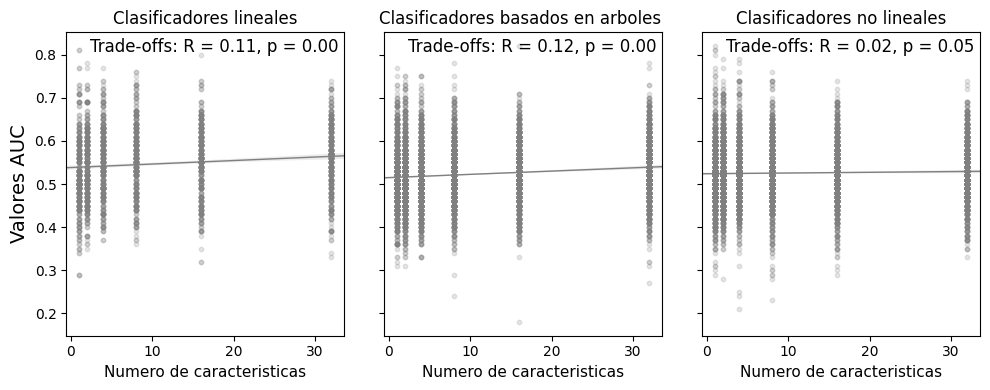

In [ ]:
plot_AUCs_n_caracteristicas_x_tipo_clf()

###**Figura 5.12. Relación entre el Rendimiento AUC y el Número de Características para cada clasificador usado en el problema del subtipo molecular Luminal A.**

In [ ]:
def plot_AUCs_n_caracteristicas_x_clf_x_subtipo(Problema_seleccionado):
###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]
  
  lista_df_n_fsel_x_clf = []
  for clf in range(len(acronimo_clf)): #len() = 13
    df_n_caracteristicas =pd.DataFrame()
    for n in range(len(n_caracteristicas)):
      lista_test_=[]     
      for fsel in range(len(acronimo_fsel)): #len() = 10
          for rs in random_state:
                gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")gs = pd.read_csv("/content/drive/MyDrive/Radiomics_Oversampling/Estrategia_A/"+ Problema_seleccionado + "/"+ over_sampling+"/clasificadores/"+name_estimador+"/"+fsels[fsel]+"/_"+str(Random_State)+"/"+Problema_seleccionado +"_"+classifier[clf]+"_"+over_sampling+"_rs_"+str(Random_State)+fsels[fsel]+str(n_caracteristicas[n])+".csv")
                feature_sel_test_ = float(gs.iloc[:,1][2])
                feature_sel_test = round(feature_sel_test_, 2)
                lista_test_.append(feature_sel_test)
            
      # Crear dataframes para cada clasificador
      num_fsel =str(n_caracteristicas[n])
      df_n_caracteristicas_test = pd.DataFrame({num_fsel: lista_test_})
      df_n_caracteristicas = pd.concat([df_n_caracteristicas, df_n_caracteristicas_test], axis=1)
    lista_df_n_fsel_x_clf.append(df_n_caracteristicas)
       


  fig, axs = plt.subplots(4, 3, figsize=(8, 10), sharex=True, sharey=True)
  for clf, ax in enumerate(axs.flatten()):
    df_n_fsel_clf = lista_df_n_fsel_x_clf[clf]
    x_regresion = []
    y_regresion = []
    for n in range(len(n_caracteristicas)):
      num_fsel_ =str(n_caracteristicas[n])
      y = df_n_fsel_clf[num_fsel_].tolist()
      y_regresion.append(y)

      n_f = n_caracteristicas[n]
      x = list([n_f] * len(y))
      x_regresion.append(x)

    # Calcular la regresión lineal y el valor p
    x_regresion = np.array(x_regresion).flatten()
    y_regresion = np.array(y_regresion).flatten()

    #grafico
    slope, intercept, r_value, p_value, std_err = linregress(x_regresion,y_regresion)
    sns.regplot(x=x_regresion, y=y_regresion, ax=ax, color='gray', scatter_kws={"s": 10, "alpha": 0.2}, ci=95, line_kws={"linewidth":1}, truncate=False, scatter=True)
    if clf in [0,3,6,9]:
      ax.set_ylabel("Valores AUC")
    if clf in [9,10,11]:
      ax.set_xlabel("Numero de caracteristicas", fontsize=8)
    
    # Agregar texto en el gráfico
    ax.text(0.98, 0.98,'Trade-offs: R = {:.2f}, p = {:.2f}'.format(r_value, p_value), fontsize=8,transform=ax.transAxes, horizontalalignment='right',verticalalignment='top')
    ax.set_title(columnas_df[clf])
  
  #pone nombre a la figura
  if Problema_seleccionado == "luminal_A":
      fig.suptitle("Luminal A", fontsize=14)
  elif Problema_seleccionado == "luminal_B":
      fig.suptitle("Luminal B")
  elif Problema_seleccionado == "her2":
      fig.suptitle("Her 2", fontsize=14)
  elif Problema_seleccionado == "triple_negative":
      fig.suptitle("Triple Negativo", fontsize=14)
  fig.tight_layout() 
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_2_objetivo_3_"+Problema_seleccionado+".png", dpi=300,bbox_inches='tight') 
  plt.show()

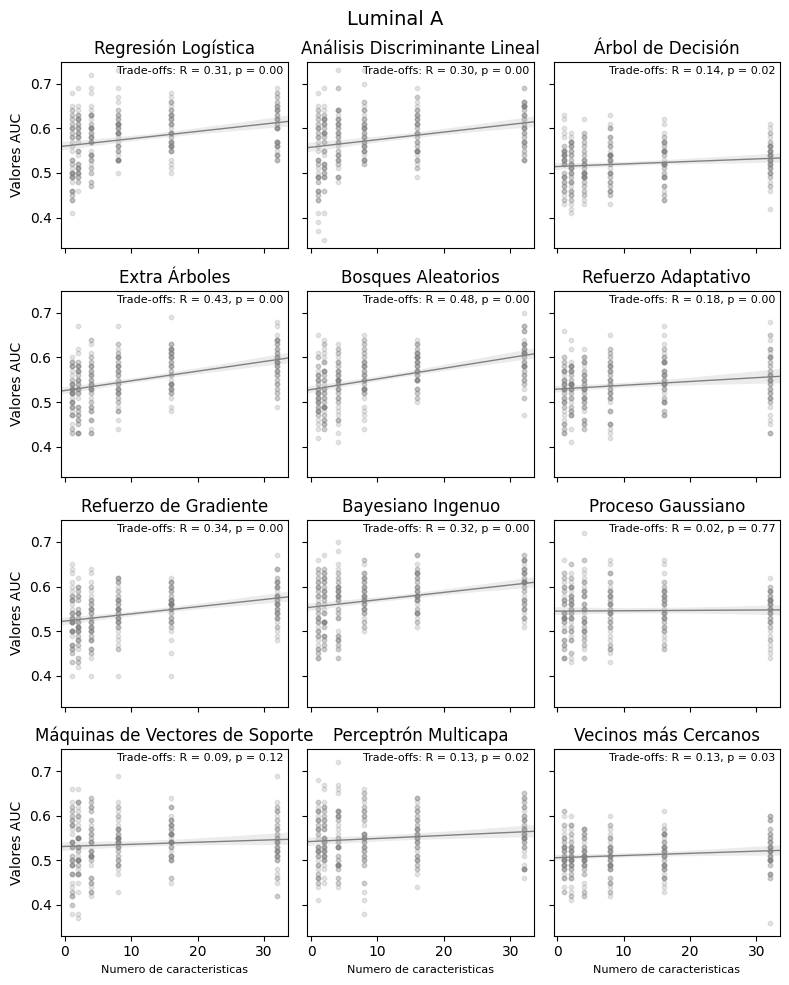

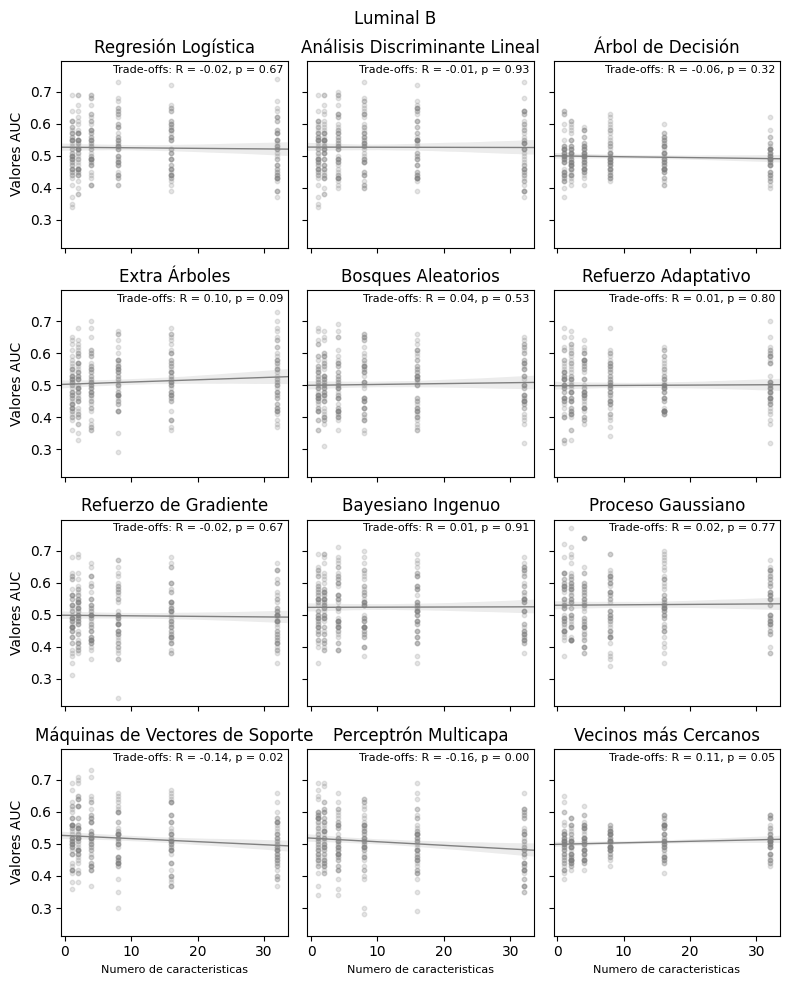

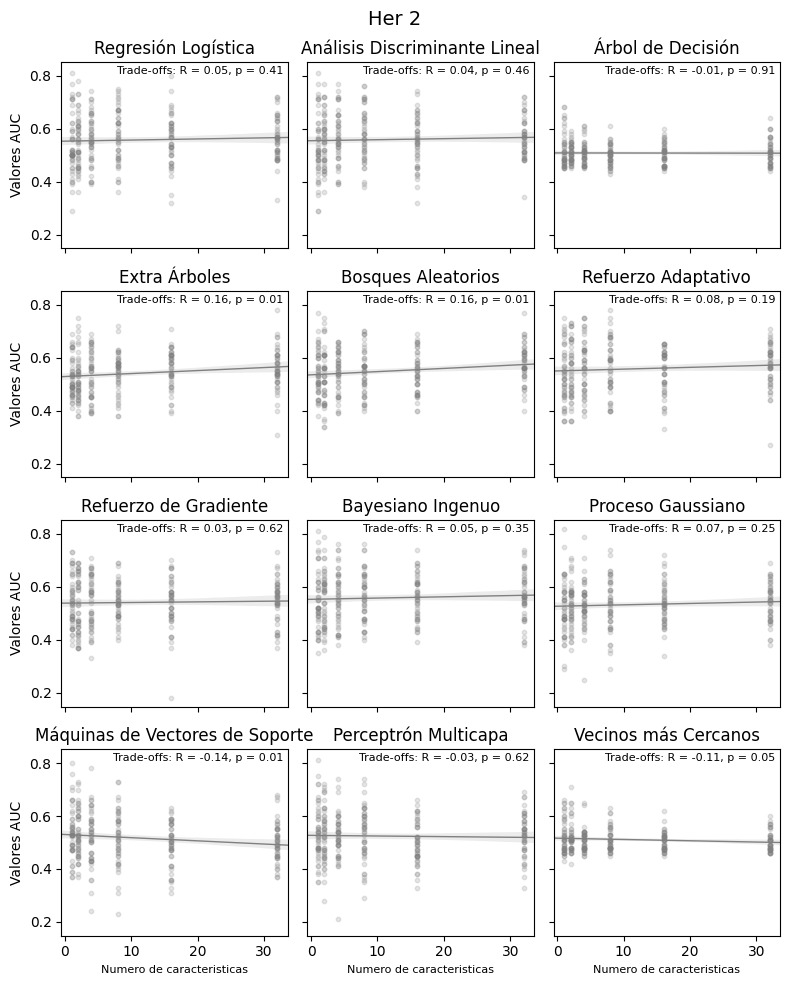

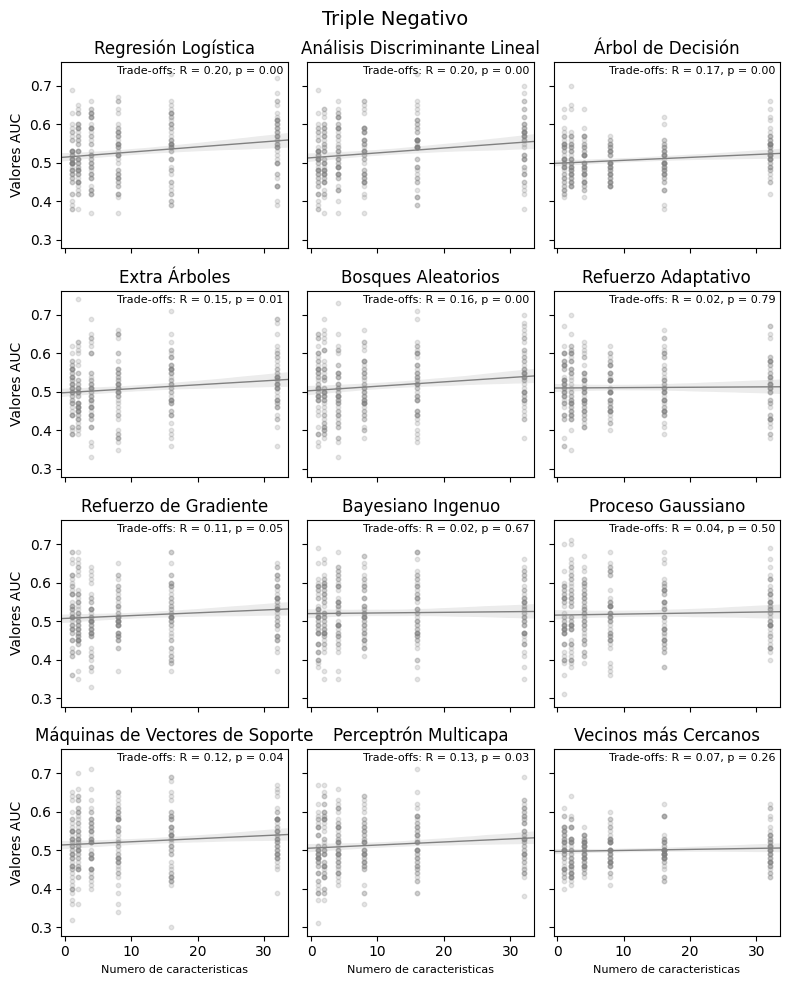

In [ ]:
for i in range(4):
  plot_AUCs_n_caracteristicas_x_clf_x_subtipo(Problema_seleccionado[i])

##**Porcentaje de varianza**

###**Figura 5.13. Porcentaje de varianza todos los subtipos**

Porcentaje de varianza de AUC explicada por los factores experimentales y sus interacciones para los 4 subtipos moleculares, donde las variables a estudiar son: clasificador (clf), método selección de características (sel_car) y número de características (num_car).

In [ ]:
def anova_3_factores():
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  

  ###Clasificadores###         
  #Abreviatura de clasificadores usada en los archivos
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']

  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]

  combinaciones = itertools.product(acronimo_clf, acronimo_fsel, n_caracteristicas)

  idx_labels = [(c[0], c[1], c[2]) for c in combinaciones]

  # Crear el índice multi-nivel
  multi_idx = pd.MultiIndex.from_tuples(idx_labels)

  array_auc = []
 
  for clf in range(len(acronimo_clf)):
    for fsel in range(len(acronimo_fsel)):
      for n in range(len(n_caracteristicas)):
        array_auc_= []
        for rs in random_state:
          for i in range(len(Problema_seleccionado)):
              Problema_seleccionado = Problema_seleccionado[i]
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc_.append(feature_sel_test)
        array_auc.append(round(np.median(array_auc_),2))

  data_ = {"Valores_AUC":array_auc}
  df= pd.DataFrame(data = data_, index = multi_idx)
  df.reset_index(inplace=True)
  df= df.rename(columns={"level_0":"clf", "level_1":"sel_car" , "level_2": "num_car"})

  # Ajustar modelo lineal y calcular tabla ANOVA

  modelo = ols('Valores_AUC ~ C(clf) + C(sel_car) + C(num_car) + C(clf):C(sel_car) + C(clf):C(num_car) + C(sel_car):C(num_car)', data=df).fit()
  # Mostrar tabla ANOVA
  df_anova = sm.stats.anova_lm(modelo, typ=2)
  # Calculamos el porcentaje de sum_sq para cada factor
  df_anova['porcentaje_de_varianza'] = (df_anova['sum_sq'] / df_anova['sum_sq'].sum()) * 100
  df_anova.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_4_objetivo_3.xlsx")
  fila_residual = df_anova.loc['Residual']
  df_anova = df_anova.drop('Residual', axis=0)
  df_anova.reset_index(inplace=True)
  # Graficamos el porcentaje de varianza explicado por cada factor
  fig, ax = plt.subplots(figsize=(10, 8))
  colores = ['b', 'b', 'b'] + ['g'] * (len(df_anova) - 3) # lista de colores para cada barra
  ax.bar(df_anova['index'], df_anova['porcentaje_de_varianza'], color=colores)
  # Cambiar el tamaño de los valores del eje x
  ax.tick_params(axis='x', labelsize=12)
  ax.set_ylabel('Porcentaje de varianza', fontsize=16)
  ax.set_xlabel('Factores del experimento', fontsize=16)

  # agregar el comentario en la esquina superior derecha
  ax.text(0.98, 0.98, '% Residual = {:.2f}'.format(round(fila_residual[4], 2)), fontsize=16, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

  # ajusta las etiquetas del eje x
  etiquetas = ['clf', 'sel_car', 'num_car','clf:sel_car', 'clf:num_car', 'sel_car:num_car']
  ax.set_xticklabels(etiquetas, rotation=90, ha='right')
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_4_objetivo_3.png", dpi=300,bbox_inches='tight') 
  # mostrar el plot
  plt.show()





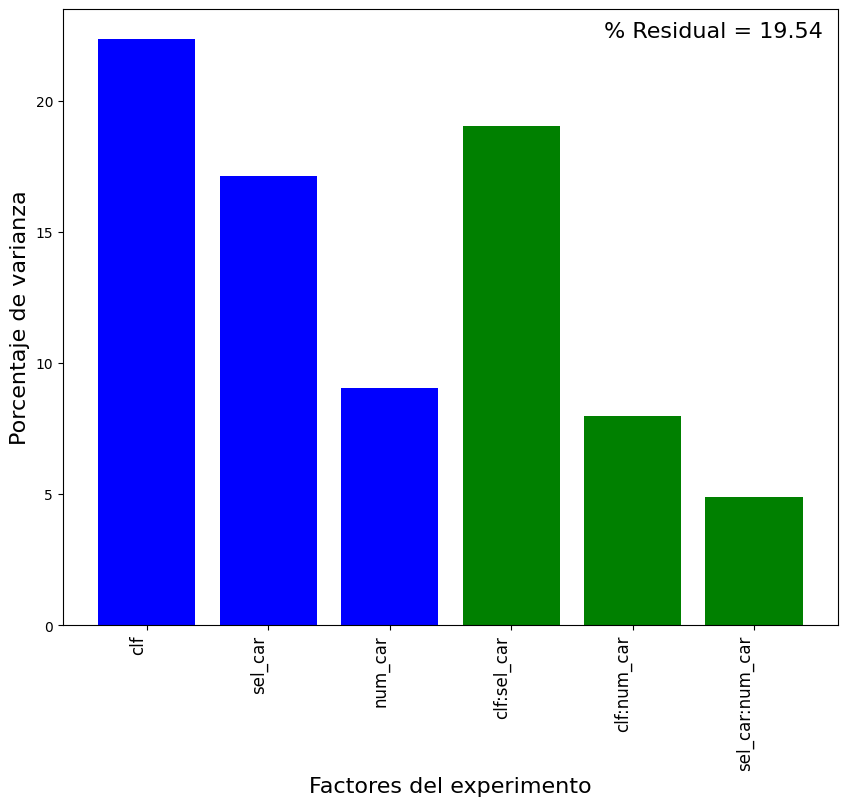

In [ ]:
anova_3_factores()

###**Figura 5.14. Porcentaje de varianza por subtipo**

Porcentaje de varianza de AUC explicada por los factores experimentales y sus interacciones para cada subtipo molecular. Las variables a estudiar fueron: clasificador (clf), método selección de características (sel_car), número de características (num_car) y el random state (rs) seleccionado en la partición de datos.

In [ ]:
def anova_por_subtipo_4_factores_grafico():
  ###Problemas de clasificacion###
  Problema_seleccionado = ["luminal_A", 
                        "luminal_B",
                        "her2",
                        "triple_negative"]  
  ###Clasificadores###
  #Acronimo para uso en el mapa de calor
  acronimo_clf = ['RL', 'ADL', 'AD', 'EA', 'BA', 'RA', 'RG', 'BI', 'PG', 'MVS', 'PMC', 'VMC']
  #Nombres en español  el dataframe resume
  columnas_df = ['Regresión Logística',
                'Análisis Discriminante Lineal',
                'Árbol de Decisión',
                'Extra Árboles',
                'Bosques Aleatorios',
                'Refuerzo Adaptativo',
                'Refuerzo de Gradiente',
                'Bayesiano Ingenuo',
                'Proceso Gaussiano',
                'Máquinas de Vectores de Soporte',
                'Perceptrón Multicapa',
                'Vecinos más Cercanos']


  ###M #metodos de seleccion de caracteristicas
  ##Abreviatura de clasificadores usada en los archivos
  acronimo_fsel = ['PF', 'RELF', 'MF', 'IG', 'PT', 'PW', 'IM', 'IMC', 'MIM', 'MRMR']
  indices_df = ['Puntuación de Fisher', 
                 'ReliefF', 
                 'Medida F', 
                 'Índice de Gini', 
                 'Puntuación de T', 
                 'Prueba de Wilcoxon', 
                 'Coeficiente Máximo de Información',
                 'Información Mutua Conjunta', 
                 'Maximización de la Información Mutua',
                 'Mínima Redundancia y Máxima Relevancia']
  
  #Numero de seleccion de caracteristicas
  n_caracteristicas = [1,2,4,8,16,32]

  #Numero de ramdom state
  random_state = [0,42,50,60,90]

  combinaciones = itertools.product(acronimo_clf, acronimo_fsel, n_caracteristicas)

  idx_labels = [(c[0], c[1], c[2]) for c in combinaciones]


  # Crear el índice multi-nivel
  multi_idx = pd.MultiIndex.from_tuples(idx_labels)

  #Ciclos para abrir los archivos donde estan los AUC dependido del subtipo molecular, clasificador, seleccion de caracteristca,, numero de cacracteristica y random state.
  lista_df = []
  for probl in Problema_seleccionado: 
    array_auc = []
    for clf in range(len(acronimo_clf)):
      for fsel in range(len(acronimo_fsel)):
        for n in range(len(n_caracteristicas)):
          for rs in random_state:
              #Abre los archivos csv donde se almacenan los valores de los auc de cada experimento en funcion del numero de caracteristicas. 
              gs = pd.read_csv("/content/drive/MyDrive/tesis/"+ Problema_seleccionado[probl] +"/clasificadores/"+columnas_df[clf]+"/"+fsel+"/_"+str(random_state[rs])+"/"+Problema_seleccionado[probl] +"_"+columnas_df[clf]+"_rs_"+str(random_state[rs])+fsel+str(n_caracteristicas[n])+".csv")
              feature_sel_test_ = float(gs.iloc[:,1][2])
              feature_sel_test = round(feature_sel_test_, 2)
              array_auc.append(feature_sel_test)

    #crea el df donde muestra cuales fueron los factores para cada AUC
    data_ = {"Valores_AUC":array_auc}
    df= pd.DataFrame(data = data_, index = multi_idx)
    df.reset_index(inplace=True)
    df= df.rename(columns={"level_0":"clf", "level_1":"sel_car" , "level_2": "num_car", "level_3": "rs"})
    lista_df.append(df)

  # Graficamos el porcentaje de varianza explicado por cada factor
  fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
  for problems, ax in enumerate(axs.flatten()):
    df = lista_df[problems]
    # Ajustar modelo lineal y calcular tabla ANOVA
    modelo = ols('Valores_AUC ~ C(clf) + C(sel_car) + C(num_car) + C(rs) + C(clf):C(sel_car) + C(clf):C(num_car) + C(clf):C(rs) + C(sel_car):C(num_car) + C(sel_car):C(rs) + C(num_car):C(rs) + C(clf):C(sel_car):C(rs) + C(clf):C(num_car):C(rs) + C(sel_car):C(num_car):C(rs)', data=df).fit()
                                                            
    # Mostrar tabla ANOVA
    df_anova = sm.stats.anova_lm(modelo, typ=2)
    # Calculamos el porcentaje de sum_sq para cada factor
    df_anova['porcentaje_de_varianza'] = (df_anova['sum_sq'] / df_anova['sum_sq'].sum()) * 100
    df_anova.to_excel("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_5_objetivo_3_"+Problema_seleccionado[problems]+".xlsx")
    

    #Guarda residual de anova en una lista llamada fila_residual
    fila_residual = df_anova.loc['Residual']
    # despues elimina la fila residual 
    df_anova = df_anova.drop('Residual', axis=0)

    #Transforma los indice del df de anova, a columnas. 
    df_anova.reset_index(inplace=True)
    # lista de colores para cada barra
    colores = ['b', 'b', 'b','b'] + ['g'] * (len(df_anova) - 4) 

    #grafico de barras entre eje x factores del experimento, eje y porcentaje de varianza
    ax.bar(df_anova['index'], df_anova['porcentaje_de_varianza'], color=colores)

    # agregar el comentario en la esquina superior derecha
    ax.text(0.98, 0.98, '% Residual = {:.2f}'.format(round(fila_residual[4], 2)), fontsize=12, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

    # ajusta las etiquetas del eje x
    etiquetas = ['clf', 'sel_car', 'num_car', 'rs', 'clf:sel_car', 'clf:num_car', 'clf:rs', 'sel_car:num_car', 'sel_car:rs', 'num_car:rs', 'clf:sel_car:rs', 'clf:num_car:rs', 'sel_car:num_car:rs']
    ax.set_xticklabels(etiquetas, rotation=90, ha='right')
    ax.set_ylim(0, 16)
    # Ocultar las etiquetas de los ejes x e y de los subplot no deseados
    if (problems+1) % 2 != 0:
        ax.set_ylabel('Porcentaje de varianza', fontsize=12)
    if problems < 2:
        ax.set_xlabel('Factores del experimento', fontsize=12)

    # Mostrar solo las etiquetas de los ejes y en la primera columna y las etiquetas de los ejes x en la segunda fila
    if problems == 0 or problems == 2:
        ax.set_ylabel('Porcentaje de varianza', fontsize=12)
    else:
        ax.yaxis.set_visible(False)

    if problems == 2 or problems == 3:
        ax.set_xlabel('Factores del experimento', fontsize=12)
    else:
        ax.xaxis.set_visible(False)
    
    #pone nombre a los subplot
    if Problema_seleccionado[problems] == "luminal_A":
      ax.set_title("Luminal A", fontsize=18)
    elif Problema_seleccionado[problems] == "luminal_B":
      ax.set_title("Luminal B", fontsize=18)
    elif Problema_seleccionado[problems] == "her2":
      ax.set_title("Her 2", fontsize=18)
    elif Problema_seleccionado[problems] == "triple_negative":
      ax.set_title("Triple Negativo", fontsize=18)
  # mostrar el plot
  fig.tight_layout()  
  plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_5_objetivo_3.png", dpi=300,bbox_inches='tight') 
  plt.show()



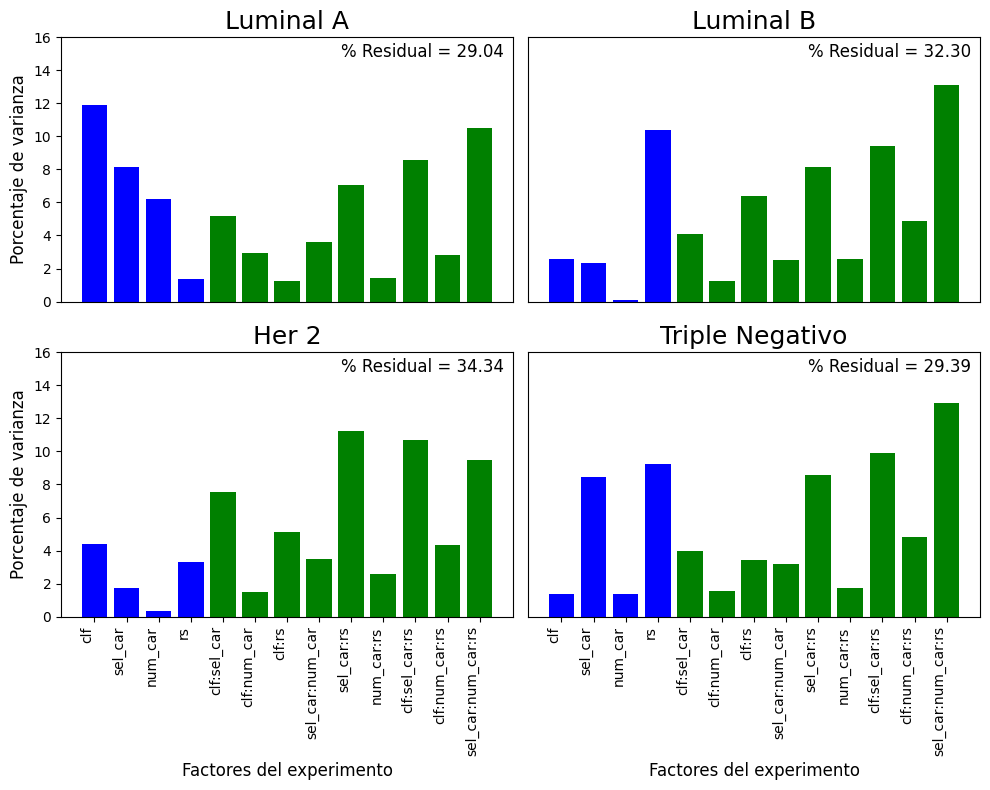

In [ ]:
anova_por_subtipo_4_factores_grafico()

In [ ]:
lista_anova_concat_re 

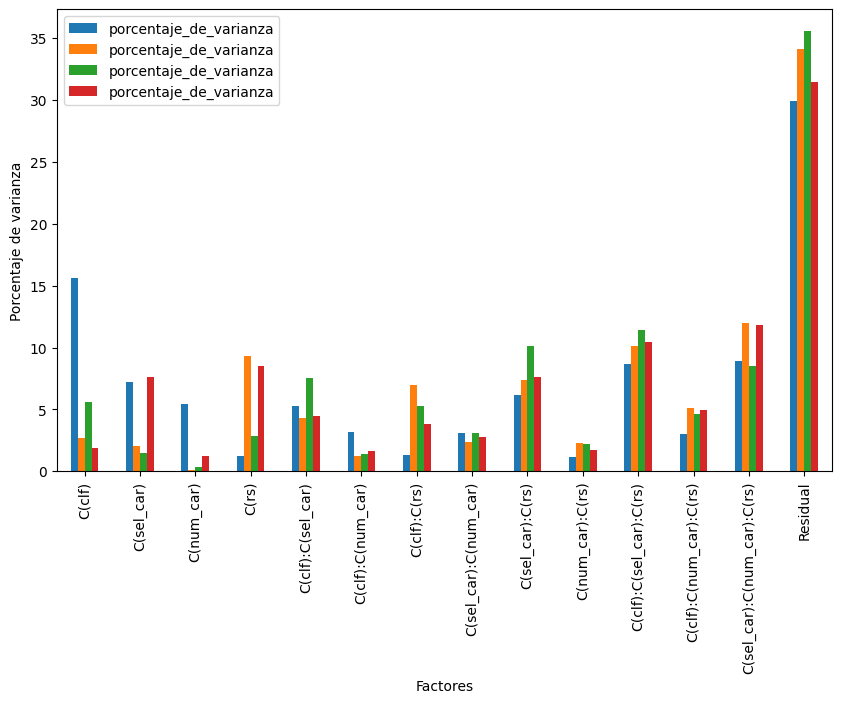

In [ ]:

ax = lista_anova_concat_re.plot(kind='bar')
ax.figure.set_size_inches(10, 6)  # Establece el tamaño de la figura en pulgadas (ancho, alto)
ax.set_xlabel("Factores")
ax.set_ylabel("Porcentaje de varianza")

ax.set_xticklabels(lista_anova_concat_re.index, rotation=90)  # Rota las etiquetas del eje x en 90 grados


# Mostrar el gráfico
plt.show()

##**Figura 6.1. Discusion a Saha**

Figura 6.1. Análisis Comparativo de Rendimientos de Modelos de Radiomics para determinar el subtipo molecular en cáncer de mama: Berrios vs Saha.

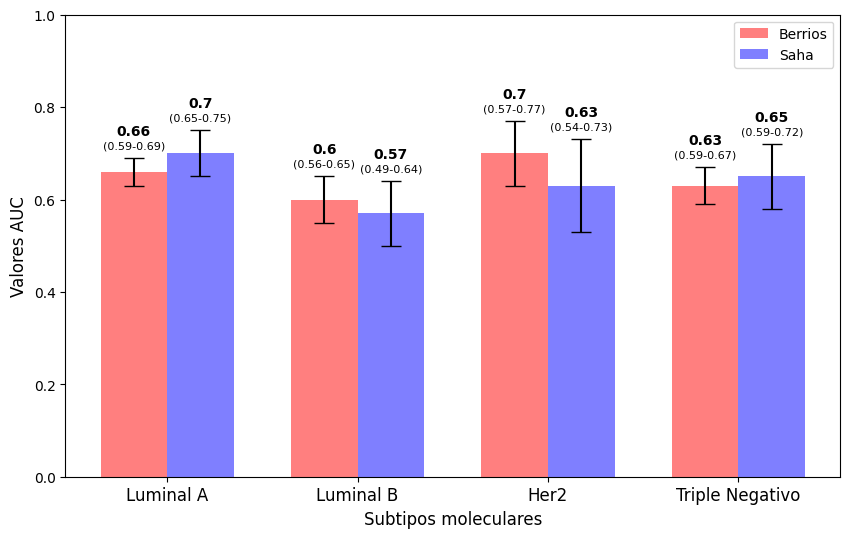

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear dataframes berrios-saha
data1 = {
    'Categorias': ['Luminal A', 'Luminal B', 'Her2', 'Triple Negativo'],
    'Mediana': [0.66, 0.6, 0.7, 0.63],
    'Intervalo_inferior': [0.59, 0.56, 0.57, 0.59],
    'Intervalo_superior': [0.69, 0.65, 0.77, 0.67],
    'Label': 'Berrios'
}

data2 = {
    'Categorias': ['Luminal A', 'Luminal B', 'Her2', 'Triple Negativo'],
    'Mediana': [0.7,0.57,0.63,0.65],
    'Intervalo_inferior': [0.65,0.49,0.54,0.59],
    'Intervalo_superior': [0.75,0.64,0.73,0.72],
    'Label': 'Saha'
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Calcular el error
df1['Error'] = df1['Intervalo_superior'] - df1['Mediana']
df2['Error'] = df2['Intervalo_superior'] - df2['Mediana']


fig, ax = plt.subplots(figsize=(10, 6))

barWidth = 0.35
r1 = np.arange(len(df1['Mediana']))
r2 = [x + barWidth for x in r1]

ax.bar(r1, df1['Mediana'], width = barWidth, color = 'red', yerr=df1['Error'], capsize=7, label='Berrios', alpha = 0.5)
ax.bar(r2, df2['Mediana'], width = barWidth, color = 'blue', yerr=df2['Error'], capsize=7, label='Saha', alpha = 0.5)

# Añadir anotaciones con la mediana y el intervalo de confianza
for index, row in df1.iterrows():
    ax.text(index, row['Intervalo_superior'] + 0.05, f"{row['Mediana']}", color='black', ha="center", fontsize=10, fontweight='bold')
    ax.text(index, row['Intervalo_superior'] + 0.02, f"({row['Intervalo_inferior']}-{row['Intervalo_superior']})", color='black', ha="center", fontsize=8)

for index, row in df2.iterrows():
    ax.text(index + barWidth, row['Intervalo_superior'] + 0.05, f"{row['Mediana']}", color='black', ha="center", fontsize=10, fontweight='bold')
    ax.text(index + barWidth, row['Intervalo_superior'] + 0.02, f"({row['Intervalo_inferior']}-{row['Intervalo_superior']})", color='black', ha="center", fontsize=8)

# Establecer la etiqueta del eje x con formato en negrita
ax.set_xlabel('Subtipos moleculares', fontsize=12)
# Configurar etiquetas del eje y
ax.set_ylabel('Valores AUC', fontsize=12)
ax.set_xticks([r + barWidth / 2 for r in range(len(df1['Mediana']))])
ax.set_xticklabels(df1['Categorias'], fontsize=12)
ax.set_ylim(0, 1) 

# Añadir leyenda
plt.legend()
plt.savefig("/content/drive/MyDrive/tesis/Resultados_Tesis/Resultado_6_objetivo_3_anexo.png", dpi=300,bbox_inches='tight') 
plt.show()
